In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler,LabelEncoder

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Entregable 1/bmw_pricing_v3.csv')

In [3]:
df.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [5]:
df.shape

(4843, 18)

In [6]:
len(df)

4843

In [7]:
df.isnull().sum()

marca                           970
modelo                            3
km                                2
potencia                          1
fecha_registro                 2423
tipo_gasolina                     5
color                           445
tipo_coche                     1460
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
gps                               0
alerta_lim_velocidad            728
precio                            6
fecha_venta                       1
dtype: int64

In [8]:
len(df[df.duplicated()])

0

In [9]:
df.describe()

,km,potencia,precio
count,4.841000e+03,4842.000000,4837.000000
mean,1.409593e+05,128.981826,15831.920612
std,6.020853e+04,38.994839,9222.630708
min,-6.400000e+01,0.000000,100.000000
25%,1.028840e+05,100.000000,10800.000000
50%,1.410800e+05,120.000000,14200.000000
75%,1.752170e+05,135.000000,18600.000000
max,1.000376e+06,423.000000,178500.000000


In [10]:
df[df['precio']>=125000]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
4684,BMW,X4,103222.0,140.0,2014-08-01,diesel,grey,suv,True,True,False,NaN,True,False,True,True,142800.0,2018-08-01
4753,BMW,X3,72515.0,135.0,2013-03-01,diesel,blue,suv,False,False,True,NaN,False,NaN,False,True,178500.0,2018-08-01


In [11]:
df[df['precio']<=3000]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
25,BMW,318,196092.0,85.0,1995-10-01,petrol,NaN,convertible,True,False,False,False,False,False,False,False,1800.0,2018-05-01
36,BMW,318,187294.0,105.0,NaN,petrol,NaN,convertible,True,False,False,False,False,True,True,NaN,2400.0,2018-06-01
46,BMW,318,187104.0,105.0,2001-09-01,petrol,red,convertible,True,False,False,False,False,True,True,False,2600.0,2018-08-01
56,BMW,320,329173.0,110.0,2004-07-01,diesel,silver,NaN,True,False,False,NaN,False,NaN,True,True,2300.0,2018-08-01
58,BMW,316,265751.0,85.0,NaN,petrol,silver,coupe,False,False,False,NaN,False,NaN,False,False,1000.0,2018-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,BMW,X5,350316.0,170.0,NaN,petrol,black,NaN,True,False,False,NaN,False,False,True,True,3000.0,2018-03-01
4356,BMW,X3,79685.0,190.0,2014-02-01,diesel,black,suv,False,False,False,NaN,False,False,False,NaN,100.0,2018-05-01
4802,BMW,NaN,118640.0,110.0,NaN,diesel,white,NaN,False,False,False,NaN,False,False,False,False,800.0,2018-03-01
4806,BMW,218,118323.0,110.0,2014-09-01,diesel,white,NaN,False,False,False,NaN,False,False,False,False,800.0,2018-02-01


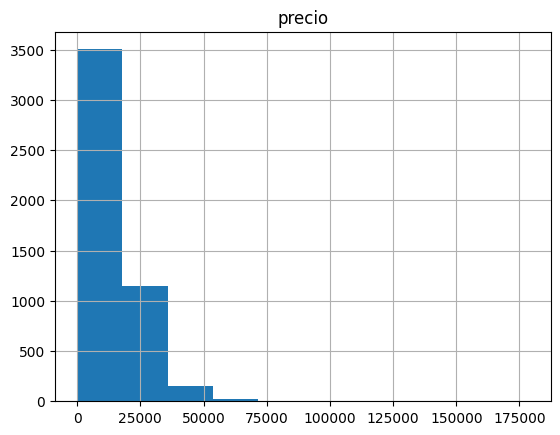

In [12]:
df.hist('precio');

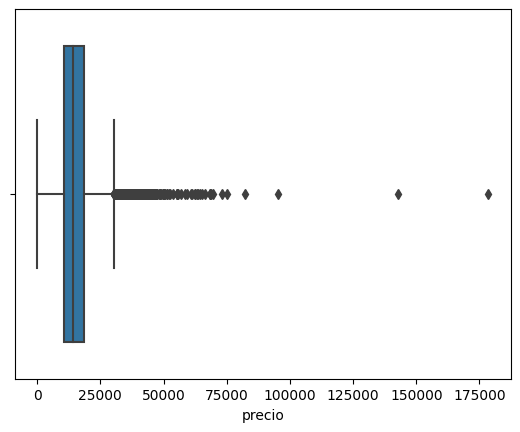

In [13]:
sns.boxplot(x='precio', data = df);

In [14]:
df1 = df.copy()

In [15]:
media_precio = df1[(df1['precio']<125000) & (df1['precio']>3000)]['precio'].mean()

In [16]:
df1['precio'] = np.where((df1['precio']<=3000) | (df1['precio']>=125000), media_precio, df1['precio'])

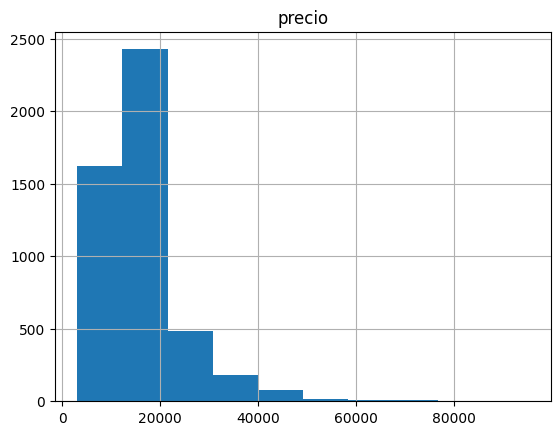

In [17]:
df1.hist('precio');

In [18]:
df1.isnull().sum()

marca                           970
modelo                            3
km                                2
potencia                          1
fecha_registro                 2423
tipo_gasolina                     5
color                           445
tipo_coche                     1460
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
gps                               0
alerta_lim_velocidad            728
precio                            6
fecha_venta                       1
dtype: int64

In [19]:
df1[df1['precio'].isnull()]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
117,BMW,420,174740.0,135.0,2013-11-01,diesel,NaN,coupe,True,True,True,False,True,True,True,True,NaN,2018-05-01
524,BMW,520,163803.0,135.0,NaN,diesel,grey,estate,False,True,True,False,False,False,True,False,NaN,2018-02-01
539,BMW,316,34489.0,85.0,NaN,diesel,black,estate,True,False,False,NaN,False,False,True,False,NaN,2018-02-01
549,BMW,318,157129.0,100.0,NaN,diesel,blue,estate,True,NaN,True,False,True,False,True,True,NaN,2018-03-01
569,BMW,320,166866.0,120.0,NaN,diesel,blue,NaN,True,True,False,NaN,True,True,True,True,NaN,2018-03-01
584,BMW,320,114771.0,135.0,NaN,diesel,blue,NaN,False,True,False,NaN,False,False,True,False,NaN,2018-03-01


In [20]:
df2 = df1.copy()

In [21]:
df2['precio'].fillna(media_precio, inplace = True)

In [22]:
df2.isnull().sum()

marca                           970
modelo                            3
km                                2
potencia                          1
fecha_registro                 2423
tipo_gasolina                     5
color                           445
tipo_coche                     1460
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
gps                               0
alerta_lim_velocidad            728
precio                            0
fecha_venta                       1
dtype: int64

In [23]:
df2[df2['km']<=0]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
2938,NaN,640 Gran Coupé,-64.0,230.0,NaN,diesel,black,sedan,True,True,False,NaN,False,False,True,True,75000.0,2018-04-01


In [24]:
df2[df2['km']>=1.000376e+06]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
3732,BMW,118,1000376.0,90.0,2005-03-01,diesel,NaN,NaN,True,False,False,False,False,NaN,True,False,16136.591054,2018-06-01


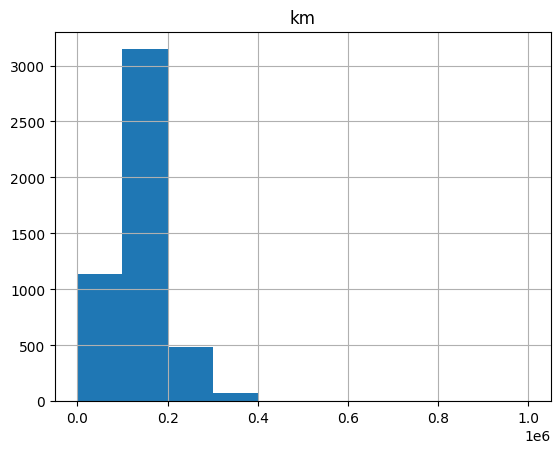

In [25]:
df2.hist('km');

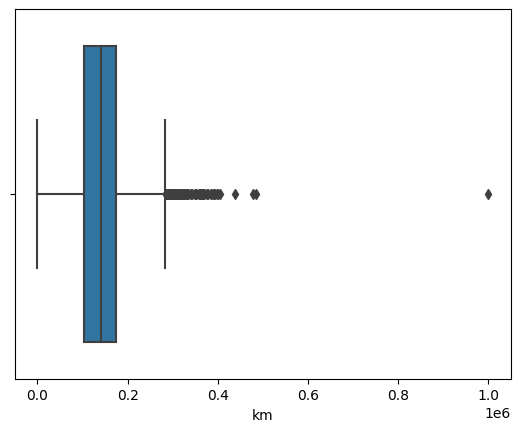

In [26]:
sns.boxplot(x= 'km', data = df2);

In [27]:
df2[df2['km'].isnull()]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
459,BMW,520,NaN,135.0,2012-12-01,diesel,black,NaN,True,True,True,False,True,True,True,True,20300.0,2018-02-01
4811,BMW,X3,NaN,190.0,NaN,diesel,blue,van,True,True,True,True,True,False,True,True,19500.0,2018-07-01


In [28]:
df3 = df2.copy()

In [29]:
media_km=df3[df3["km"]>0]['km'].mean()

In [30]:
df3['km'] = np.where(df3['km']<=0,media_km,df3['km'])

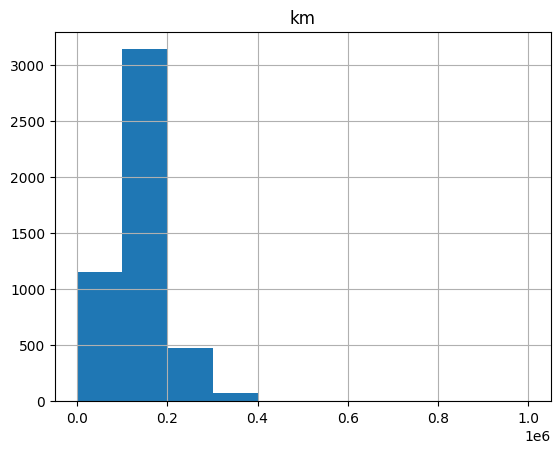

In [31]:
df3.hist('km');

In [32]:
df3['km'].fillna(media_km, inplace= True)

In [33]:
df3.isnull().sum()

marca                           970
modelo                            3
km                                0
potencia                          1
fecha_registro                 2423
tipo_gasolina                     5
color                           445
tipo_coche                     1460
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
gps                               0
alerta_lim_velocidad            728
precio                            0
fecha_venta                       1
dtype: int64

In [34]:
df4 = df3.copy()

In [35]:
df4.describe()

,km,potencia,precio
count,4.843000e+03,4842.000000,4843.000000
mean,1.409885e+05,128.981826,16136.591054
std,6.016197e+04,38.994839,8416.311345
min,4.760000e+02,0.000000,3100.000000
25%,1.029885e+05,100.000000,11200.000000
50%,1.410680e+05,120.000000,14500.000000
75%,1.751955e+05,135.000000,18600.000000
max,1.000376e+06,423.000000,95200.000000


In [36]:
df4[df4['potencia']==0]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
3765,BMW,X1,81770.0,0.0,2014-10-01,diesel,white,suv,False,False,False,False,False,False,False,NaN,11700.0,2018-03-01


In [37]:
df4[df4['potencia']>=350]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
3601,BMW,M5,150187.0,412.0,NaN,petrol,white,sedan,True,True,True,NaN,True,True,True,True,41600.0,2018-09-01
4146,NaN,X6 M,2970.0,423.0,2016-04-01,petrol,red,suv,True,NaN,True,False,False,False,True,True,82400.0,2018-04-01


In [38]:
df4[df4['potencia']<=75]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
1796,BMW,i3,152328.0,25.0,NaN,hybrid_petrol,black,NaN,False,True,False,NaN,False,False,True,NaN,20300.000000,2018-04-01
1804,NaN,114,179307.0,70.0,NaN,diesel,blue,hatchback,False,True,False,NaN,False,False,True,False,8300.000000,2018-07-01
1847,BMW,114,100398.0,70.0,NaN,diesel,white,hatchback,False,True,False,NaN,False,True,True,False,10700.000000,2018-02-01
1895,BMW,i3,26542.0,75.0,2014-03-01,electro,grey,NaN,False,NaN,False,NaN,False,NaN,True,True,20900.000000,2018-02-01
1925,BMW,i3,152470.0,25.0,NaN,hybrid_petrol,black,hatchback,False,True,False,NaN,False,False,True,True,15500.000000,2018-03-01
1983,BMW,114,57344.0,70.0,NaN,diesel,grey,NaN,False,True,False,NaN,False,False,True,False,11800.000000,2018-03-01
1988,BMW,114,150373.0,70.0,2013-06-01,diesel,brown,hatchback,False,True,False,NaN,False,False,True,False,8200.000000,2018-03-01
2001,NaN,114,72527.0,70.0,2013-11-01,diesel,silver,NaN,False,NaN,False,NaN,False,NaN,True,False,9300.000000,2018-03-01
2168,BMW,114,15546.0,75.0,2014-04-01,petrol,black,hatchback,False,False,False,NaN,False,NaN,True,NaN,10800.000000,2018-05-01
2196,BMW,114,52299.0,75.0,2013-01-01,petrol,black,NaN,False,False,False,False,True,True,True,False,13400.000000,2018-09-01


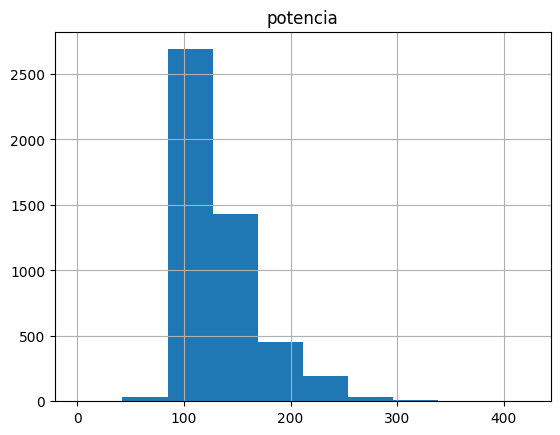

In [39]:
df4.hist('potencia');

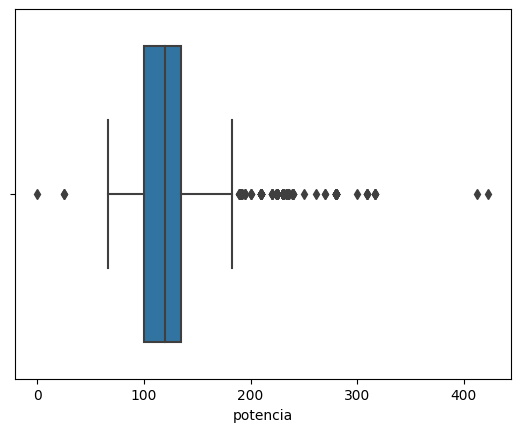

In [40]:
sns.boxplot(x='potencia', data = df4);

In [41]:
df4[df4['tipo_gasolina'] == 'hybrid_petrol'] # ver la relación de los hybrid_petro con la potencia

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
90,BMW,i8,12402.0,170.0,NaN,hybrid_petrol,grey,coupe,True,True,False,False,False,False,False,True,95200.0,2018-04-01
1796,BMW,i3,152328.0,25.0,NaN,hybrid_petrol,black,NaN,False,True,False,NaN,False,False,True,NaN,20300.0,2018-04-01
1925,BMW,i3,152470.0,25.0,NaN,hybrid_petrol,black,hatchback,False,True,False,NaN,False,False,True,True,15500.0,2018-03-01
2925,BMW,ActiveHybrid 5,94374.0,225.0,2012-05-01,hybrid_petrol,brown,sedan,True,True,False,False,True,True,True,True,21100.0,2018-04-01
3690,BMW,i3,6572.0,75.0,2015-11-01,hybrid_petrol,black,NaN,True,True,True,False,False,False,True,NaN,28000.0,2018-03-01
4018,BMW,X5,33639.0,180.0,NaN,hybrid_petrol,grey,suv,True,True,False,NaN,True,False,True,True,52200.0,2018-03-01
4214,BMW,X5,129317.0,230.0,NaN,hybrid_petrol,blue,suv,True,False,False,False,False,False,True,True,46300.0,2018-04-01
4370,BMW,X6,134154.0,300.0,NaN,hybrid_petrol,black,NaN,True,True,False,True,True,False,True,True,22000.0,2018-06-01


In [42]:
df4[df4['potencia']==25]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
1796,BMW,i3,152328.0,25.0,NaN,hybrid_petrol,black,NaN,False,True,False,NaN,False,False,True,NaN,20300.0,2018-04-01
1925,BMW,i3,152470.0,25.0,NaN,hybrid_petrol,black,hatchback,False,True,False,NaN,False,False,True,True,15500.0,2018-03-01


In [43]:
df4.replace({25:75}, inplace = True) #cambiamos por 75 ya que seguramente sea la potencia que tengan en realidad

In [44]:
df5 = df4.copy()

In [45]:
df5[df5['tipo_gasolina']== 'hybrid_petrol'] #comprobamos los cambios estén OK

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
90,BMW,i8,12402.0,170.0,NaN,hybrid_petrol,grey,coupe,True,True,False,False,False,False,False,True,95200.0,2018-04-01
1796,BMW,i3,152328.0,75.0,NaN,hybrid_petrol,black,NaN,False,True,False,NaN,False,False,True,NaN,20300.0,2018-04-01
1925,BMW,i3,152470.0,75.0,NaN,hybrid_petrol,black,hatchback,False,True,False,NaN,False,False,True,True,15500.0,2018-03-01
2925,BMW,ActiveHybrid 5,94374.0,225.0,2012-05-01,hybrid_petrol,brown,sedan,True,True,False,False,True,True,True,True,21100.0,2018-04-01
3690,BMW,i3,6572.0,75.0,2015-11-01,hybrid_petrol,black,NaN,True,True,True,False,False,False,True,NaN,28000.0,2018-03-01
4018,BMW,X5,33639.0,180.0,NaN,hybrid_petrol,grey,suv,True,True,False,NaN,True,False,True,True,52200.0,2018-03-01
4214,BMW,X5,129317.0,230.0,NaN,hybrid_petrol,blue,suv,True,False,False,False,False,False,True,True,46300.0,2018-04-01
4370,BMW,X6,134154.0,300.0,NaN,hybrid_petrol,black,NaN,True,True,False,True,True,False,True,True,22000.0,2018-06-01


In [46]:
media_potencia = df5[df5['potencia']>0]['potencia'].mean()

In [47]:
df5['potencia'] = np.where(df5['potencia']==0,media_potencia, df5['potencia'])

In [48]:
df5['potencia'].fillna(media_potencia,inplace = True)

In [49]:
df5.loc[3765,:] #check change power 0

marca                                 BMW
modelo                                 X1
km                                81770.0
potencia                       129.029126
fecha_registro                 2014-10-01
tipo_gasolina                      diesel
color                               white
tipo_coche                            suv
volante_regulable                   False
aire_acondicionado                  False
camara_trasera                      False
asientos_traseros_plegables         False
elevalunas_electrico                False
bluetooth                           False
gps                                 False
alerta_lim_velocidad                  NaN
precio                            11700.0
fecha_venta                    2018-03-01
Name: 3765, dtype: object

In [50]:
df5['fecha_venta'].unique()

array(['2018-01-01', '2018-02-01', '2018-04-01', '2018-03-01',
       '2018-09-01', '2018-05-01', '2018-06-01', '2018-07-01',
       '2018-08-01', '2007-08-01', '2010-04-01', '2009-04-01',
       '2008-06-01', nan], dtype=object)

In [51]:
df5['fecha_registro'].unique()

array(['2012-02-01', nan, '2012-04-01', '2011-05-01', '2009-08-01',
       '2014-03-01', '2015-08-01', '2009-01-01', '2008-04-01',
       '2015-07-01', '2009-05-01', '2013-02-01', '2014-10-01',
       '1995-10-01', '2005-05-01', '2014-04-01', '2016-03-01',
       '2008-07-01', '2001-09-01', '2014-05-01', '2012-05-01',
       '2008-03-01', '2014-01-01', '2016-07-01', '2004-07-01',
       '2013-01-01', '2013-11-01', '2015-09-01', '2014-11-01',
       '2015-02-01', '2012-03-01', '2011-03-01', '2012-01-01',
       '2014-08-01', '2014-02-01', '2007-07-01', '2011-12-01',
       '2014-07-01', '2015-03-01', '2012-09-01', '2016-01-01',
       '2010-11-01', '2013-10-01', '2009-07-01', '2017-11-01',
       '2009-09-01', '2010-05-01', '2007-11-01', '2008-05-01',
       '2001-04-01', '2010-12-01', '2013-03-01', '2014-06-01',
       '2013-06-01', '2014-12-01', '2015-05-01', '2013-05-01',
       '2012-11-01', '2013-04-01', '2013-09-01', '2013-12-01',
       '2012-10-01', '2005-03-01', '2009-10-01', '

In [52]:
df5['fecha_venta']=pd.to_datetime(df5['fecha_venta'])

In [53]:
df5['fecha_registro']=pd.to_datetime(df5['fecha_registro'])

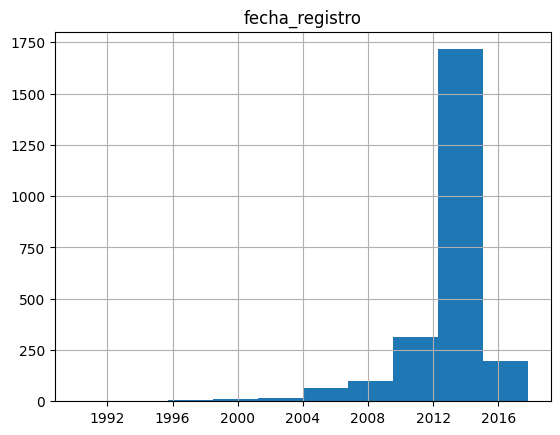

In [54]:
df5.hist('fecha_registro');

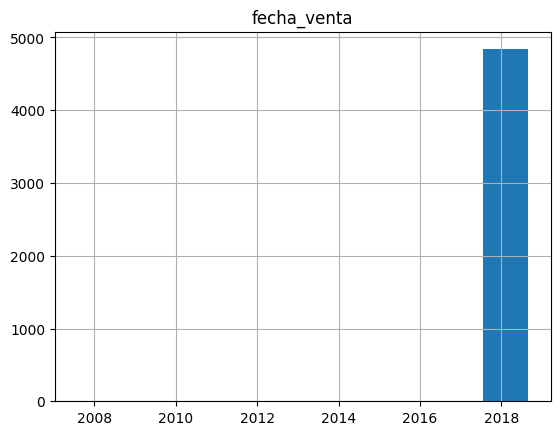

In [55]:
df5.hist('fecha_venta');

In [56]:
for col in ['fecha_venta','fecha_registro']:
    df5[col + '_NOMBREDIA'] = df5[col].dt.day_name()
    df5[col + '_ANIO'] = df5[col].dt.year

    df5[col + '_DIA'] = df5[col].dt.day
    df5[col + '_MES'] = df5[col].dt.month
    df5[col + '_ANIO'] = df5[col].dt.year

    del df5[col]
df5.head()

,marca,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,...,alerta_lim_velocidad,precio,fecha_venta_NOMBREDIA,fecha_venta_ANIO,fecha_venta_DIA,fecha_venta_MES,fecha_registro_NOMBREDIA,fecha_registro_ANIO,fecha_registro_DIA,fecha_registro_MES
0,NaN,118,140411.0,100.0,diesel,black,NaN,True,True,False,...,NaN,11300.0,Monday,2018.0,1.0,1.0,Wednesday,2012.0,1.0,2.0
1,BMW,M4,13929.0,317.0,petrol,grey,convertible,True,True,False,...,True,69700.0,Thursday,2018.0,1.0,2.0,NaN,NaN,NaN,NaN
2,BMW,320,183297.0,120.0,diesel,white,NaN,False,False,False,...,False,10200.0,Thursday,2018.0,1.0,2.0,Sunday,2012.0,1.0,4.0
3,BMW,420,128035.0,135.0,diesel,red,convertible,True,True,False,...,NaN,25100.0,Thursday,2018.0,1.0,2.0,NaN,NaN,NaN,NaN
4,BMW,425,97097.0,160.0,diesel,silver,NaN,True,True,False,...,True,33400.0,Sunday,2018.0,1.0,4.0,NaN,NaN,NaN,NaN


In [57]:
df6 = df5.copy()

In [58]:
df6.isnull().sum()

marca                           970
modelo                            3
km                                0
potencia                          0
tipo_gasolina                     5
color                           445
tipo_coche                     1460
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
gps                               0
alerta_lim_velocidad            728
precio                            0
fecha_venta_NOMBREDIA             1
fecha_venta_ANIO                  1
fecha_venta_DIA                   1
fecha_venta_MES                   1
fecha_registro_NOMBREDIA       2423
fecha_registro_ANIO            2423
fecha_registro_DIA             2423
fecha_registro_MES             2423
dtype: int64

In [59]:
df6["gps"].value_counts()

True     4514
False     329
Name: gps, dtype: int64

In [60]:
df6["gps_bool"]=df6["gps"].astype(int)

In [61]:
df6["gps_bool"].value_counts()

1    4514
0     329
Name: gps_bool, dtype: int64

In [62]:
df7 = df6.copy()

In [63]:
del(df7['gps'])

In [64]:
df7.head()

,marca,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,...,precio,fecha_venta_NOMBREDIA,fecha_venta_ANIO,fecha_venta_DIA,fecha_venta_MES,fecha_registro_NOMBREDIA,fecha_registro_ANIO,fecha_registro_DIA,fecha_registro_MES,gps_bool
0,NaN,118,140411.0,100.0,diesel,black,NaN,True,True,False,...,11300.0,Monday,2018.0,1.0,1.0,Wednesday,2012.0,1.0,2.0,1
1,BMW,M4,13929.0,317.0,petrol,grey,convertible,True,True,False,...,69700.0,Thursday,2018.0,1.0,2.0,NaN,NaN,NaN,NaN,1
2,BMW,320,183297.0,120.0,diesel,white,NaN,False,False,False,...,10200.0,Thursday,2018.0,1.0,2.0,Sunday,2012.0,1.0,4.0,1
3,BMW,420,128035.0,135.0,diesel,red,convertible,True,True,False,...,25100.0,Thursday,2018.0,1.0,2.0,NaN,NaN,NaN,NaN,1
4,BMW,425,97097.0,160.0,diesel,silver,NaN,True,True,False,...,33400.0,Sunday,2018.0,1.0,4.0,NaN,NaN,NaN,NaN,1


In [65]:
df7['marca'].nunique()

1

In [66]:
df7['marca'].unique()

array([nan, 'BMW'], dtype=object)

In [67]:
df7['marca'].fillna('BMW',inplace=True)

In [68]:
df7.isnull().sum()

marca                             0
modelo                            3
km                                0
potencia                          0
tipo_gasolina                     5
color                           445
tipo_coche                     1460
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
alerta_lim_velocidad            728
precio                            0
fecha_venta_NOMBREDIA             1
fecha_venta_ANIO                  1
fecha_venta_DIA                   1
fecha_venta_MES                   1
fecha_registro_NOMBREDIA       2423
fecha_registro_ANIO            2423
fecha_registro_DIA             2423
fecha_registro_MES             2423
gps_bool                          0
dtype: int64

In [69]:
df7[df7['modelo'].isnull()]

,marca,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,...,precio,fecha_venta_NOMBREDIA,fecha_venta_ANIO,fecha_venta_DIA,fecha_venta_MES,fecha_registro_NOMBREDIA,fecha_registro_ANIO,fecha_registro_DIA,fecha_registro_MES,gps_bool
173,BMW,NaN,146338.0,105.0,diesel,black,NaN,False,True,False,...,13300.000000,Wednesday,2018.0,1.0,8.0,NaN,NaN,NaN,NaN,1
4766,BMW,NaN,115566.0,105.0,diesel,silver,suv,False,True,False,...,14900.000000,Saturday,2018.0,1.0,9.0,Wednesday,2014.0,1.0,1.0,1
4802,BMW,NaN,118640.0,110.0,diesel,white,NaN,False,False,False,...,16136.591054,Thursday,2018.0,1.0,3.0,NaN,NaN,NaN,NaN,0


In [70]:
df7['modelo'].unique()

array(['118', 'M4', '320', '420', '425', '335', '325', 'Z4', '120', '220',
       '650', '135', '218', '318', '430', 'M3', '330', '225', 'M235',
       '316', '435', '640', '640 Gran Coupé', '435 Gran Coupé', 'i8',
       '630', '430 Gran Coupé', '635', '520', nan, '525', '530', '535',
       '320 Gran Turismo', '518', '116', '328', '523', 'X3', 'M550',
       '528', '325 Gran Turismo', '125', '318 Gran Turismo',
       '420 Gran Coupé', 'i3', '114', '520 Gran Turismo',
       '530 Gran Turismo', 'M135', '418 Gran Coupé', '330 Gran Turismo',
       '335 Gran Turismo', '730', '123', '535 Gran Turismo', '740', '750',
       'ActiveHybrid 5', '735', 'M5', 'X5', 'X1', 'X4', 'X6', 'X6 M',
       'X5 M', 'X5 M50', '218 Active Tourer', '218 Gran Tourer', '216',
       '220 Active Tourer', '216 Gran Tourer', '216 Active Tourer',
       ' Active Tourer', '225 Active Tourer', '214 Gran Tourer'],
      dtype=object)

In [71]:
df7[df7['modelo']=='118']  #Comprobar si seguían alguna lógica o patrón modelo y tipo_coche

,marca,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,...,precio,fecha_venta_NOMBREDIA,fecha_venta_ANIO,fecha_venta_DIA,fecha_venta_MES,fecha_registro_NOMBREDIA,fecha_registro_ANIO,fecha_registro_DIA,fecha_registro_MES,gps_bool
0,BMW,118,140411.0,100.0,diesel,black,NaN,True,True,False,...,11300.000000,Monday,2018.0,1.0,1.0,Wednesday,2012.0,1.0,2.0,1
7,BMW,118,115560.0,105.0,petrol,white,convertible,True,True,False,...,6100.000000,Thursday,2018.0,1.0,2.0,Saturday,2009.0,1.0,8.0,1
30,BMW,118,195114.0,105.0,diesel,red,NaN,True,True,False,...,9900.000000,Tuesday,2018.0,1.0,5.0,NaN,NaN,NaN,NaN,1
49,BMW,118,147180.0,100.0,diesel,NaN,coupe,True,NaN,True,...,8400.000000,Sunday,2018.0,1.0,7.0,Tuesday,2012.0,1.0,5.0,1
136,BMW,118,140464.0,105.0,diesel,blue,coupe,False,False,False,...,8900.000000,Wednesday,2018.0,1.0,8.0,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3721,BMW,118,54093.0,110.0,diesel,black,NaN,False,True,False,...,16300.000000,Tuesday,2018.0,1.0,5.0,Thursday,2015.0,1.0,10.0,1
3723,BMW,118,186916.0,100.0,diesel,grey,NaN,False,False,False,...,4000.000000,Tuesday,2018.0,1.0,5.0,Monday,2008.0,1.0,9.0,1
3725,BMW,118,119724.0,100.0,diesel,NaN,subcompact,False,True,False,...,9900.000000,Friday,2018.0,1.0,6.0,NaN,NaN,NaN,NaN,1
3732,BMW,118,1000376.0,90.0,diesel,NaN,NaN,True,False,False,...,16136.591054,Friday,2018.0,1.0,6.0,Tuesday,2005.0,1.0,3.0,1


In [72]:
df7.drop(df7[df7['modelo'].isnull()].index,inplace=True)  #como no la hay, eliminamos filas con nulos

In [73]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4840 entries, 0 to 4842
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        4840 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4840 non-null   float64
 3   potencia                     4840 non-null   float64
 4   tipo_gasolina                4835 non-null   object 
 5   color                        4395 non-null   object 
 6   tipo_coche                   3382 non-null   object 
 7   volante_regulable            4836 non-null   object 
 8   aire_acondicionado           4354 non-null   object 
 9   camara_trasera               4838 non-null   object 
 10  asientos_traseros_plegables  1452 non-null   object 
 11  elevalunas_electrico         4838 non-null   object 
 12  bluetooth                    4113 non-null   object 
 13  alerta_lim_velocid

In [74]:
df7.reset_index(drop=True,inplace=True)

In [75]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4840 entries, 0 to 4839
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        4840 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4840 non-null   float64
 3   potencia                     4840 non-null   float64
 4   tipo_gasolina                4835 non-null   object 
 5   color                        4395 non-null   object 
 6   tipo_coche                   3382 non-null   object 
 7   volante_regulable            4836 non-null   object 
 8   aire_acondicionado           4354 non-null   object 
 9   camara_trasera               4838 non-null   object 
 10  asientos_traseros_plegables  1452 non-null   object 
 11  elevalunas_electrico         4838 non-null   object 
 12  bluetooth                    4113 non-null   object 
 13  alerta_lim_velocid

In [76]:
df7.isnull().sum()

marca                             0
modelo                            0
km                                0
potencia                          0
tipo_gasolina                     5
color                           445
tipo_coche                     1458
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3388
elevalunas_electrico              2
bluetooth                       727
alerta_lim_velocidad            727
precio                            0
fecha_venta_NOMBREDIA             1
fecha_venta_ANIO                  1
fecha_venta_DIA                   1
fecha_venta_MES                   1
fecha_registro_NOMBREDIA       2421
fecha_registro_ANIO            2421
fecha_registro_DIA             2421
fecha_registro_MES             2421
gps_bool                          0
dtype: int64

In [77]:
df8 = df7.copy()

In [78]:
df8['tipo_gasolina'].value_counts()

diesel           4628
petrol            191
hybrid_petrol       8
Diesel              5
electro             3
Name: tipo_gasolina, dtype: int64

In [79]:
df8[df8['tipo_gasolina'].isnull()]

,marca,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,...,precio,fecha_venta_NOMBREDIA,fecha_venta_ANIO,fecha_venta_DIA,fecha_venta_MES,fecha_registro_NOMBREDIA,fecha_registro_ANIO,fecha_registro_DIA,fecha_registro_MES,gps_bool
82,BMW,420,54993.0,135.0,NaN,black,NaN,False,False,False,...,18400.000000,Thursday,2018.0,1.0,3.0,NaN,NaN,NaN,NaN,0
184,BMW,320,186697.0,135.0,NaN,white,estate,False,False,False,...,16136.591054,Sunday,2018.0,1.0,4.0,Thursday,2012.0,1.0,11.0,0
443,BMW,318,111622.0,100.0,NaN,black,estate,True,True,False,...,15400.000000,Thursday,2018.0,1.0,2.0,Tuesday,2013.0,1.0,1.0,1
479,BMW,318,170350.0,105.0,NaN,white,NaN,False,True,False,...,10200.000000,Thursday,2018.0,1.0,2.0,NaN,NaN,NaN,NaN,1
629,BMW,318,147558.0,105.0,NaN,white,estate,False,NaN,False,...,16136.591054,Thursday,2018.0,1.0,3.0,Saturday,2014.0,1.0,11.0,0


In [80]:
df8['tipo_gasolina'].fillna('SIN TIPO', inplace = True)

In [81]:
df8['tipo_gasolina'].value_counts()

diesel           4628
petrol            191
hybrid_petrol       8
SIN TIPO            5
Diesel              5
electro             3
Name: tipo_gasolina, dtype: int64

In [82]:
df8['color'].value_counts()

black     1498
grey      1070
blue       647
white      483
brown      302
silver     291
red         47
beige       37
green       14
orange       6
Name: color, dtype: int64

In [83]:
df8[df8['color'].isnull()]

,marca,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,...,precio,fecha_venta_NOMBREDIA,fecha_venta_ANIO,fecha_venta_DIA,fecha_venta_MES,fecha_registro_NOMBREDIA,fecha_registro_ANIO,fecha_registro_DIA,fecha_registro_MES,gps_bool
14,BMW,120,174631.0,120.0,diesel,NaN,convertible,True,True,False,...,10500.000000,Sunday,2018.0,1.0,4.0,Thursday,2009.0,1.0,1.0,1
18,BMW,325,205474.0,145.0,diesel,NaN,NaN,True,True,False,...,11000.000000,Sunday,2018.0,1.0,4.0,Friday,2009.0,1.0,5.0,1
25,BMW,318,196092.0,85.0,petrol,NaN,convertible,True,False,False,...,16136.591054,Tuesday,2018.0,1.0,5.0,Sunday,1995.0,1.0,10.0,0
36,BMW,318,187294.0,105.0,petrol,NaN,convertible,True,False,False,...,16136.591054,Friday,2018.0,1.0,6.0,NaN,NaN,NaN,NaN,1
47,BMW,420,20996.0,135.0,petrol,NaN,coupe,True,False,False,...,21400.000000,Sunday,2018.0,1.0,4.0,Thursday,2014.0,1.0,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4756,BMW,X4,61989.0,140.0,diesel,NaN,NaN,False,False,False,...,28600.000000,Saturday,2018.0,1.0,9.0,Monday,2014.0,1.0,12.0,0
4775,BMW,X5,285669.0,173.0,diesel,NaN,NaN,True,True,False,...,9300.000000,Saturday,2018.0,1.0,9.0,Wednesday,2007.0,1.0,8.0,1
4802,BMW,218 Active Tourer,35382.0,110.0,diesel,NaN,van,False,NaN,False,...,13100.000000,Thursday,2018.0,1.0,2.0,NaN,NaN,NaN,NaN,1
4815,BMW,X3,110039.0,130.0,diesel,NaN,NaN,False,NaN,False,...,16136.591054,Tuesday,2018.0,1.0,5.0,Wednesday,2009.0,1.0,7.0,1


In [84]:
df9 = df8.copy()

In [85]:
df9['color'].fillna('SIN COLOR', inplace = True)

In [86]:
df9['color'].value_counts()

black        1498
grey         1070
blue          647
white         483
SIN COLOR     445
brown         302
silver        291
red            47
beige          37
green          14
orange          6
Name: color, dtype: int64

In [87]:
df9.isnull().sum()

marca                             0
modelo                            0
km                                0
potencia                          0
tipo_gasolina                     0
color                             0
tipo_coche                     1458
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3388
elevalunas_electrico              2
bluetooth                       727
alerta_lim_velocidad            727
precio                            0
fecha_venta_NOMBREDIA             1
fecha_venta_ANIO                  1
fecha_venta_DIA                   1
fecha_venta_MES                   1
fecha_registro_NOMBREDIA       2421
fecha_registro_ANIO            2421
fecha_registro_DIA             2421
fecha_registro_MES             2421
gps_bool                          0
dtype: int64

In [88]:
df9['tipo_coche'].value_counts()

estate         1107
sedan           821
suv             754
hatchback       488
subcompact       77
coupe            76
convertible      30
van              29
Name: tipo_coche, dtype: int64

In [89]:
df9[df9['tipo_coche'].isnull()]

,marca,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,...,precio,fecha_venta_NOMBREDIA,fecha_venta_ANIO,fecha_venta_DIA,fecha_venta_MES,fecha_registro_NOMBREDIA,fecha_registro_ANIO,fecha_registro_DIA,fecha_registro_MES,gps_bool
0,BMW,118,140411.0,100.0,diesel,black,NaN,True,True,False,...,11300.0,Monday,2018.0,1.0,1.0,Wednesday,2012.0,1.0,2.0,1
2,BMW,320,183297.0,120.0,diesel,white,NaN,False,False,False,...,10200.0,Thursday,2018.0,1.0,2.0,Sunday,2012.0,1.0,4.0,1
4,BMW,425,97097.0,160.0,diesel,silver,NaN,True,True,False,...,33400.0,Sunday,2018.0,1.0,4.0,NaN,NaN,NaN,NaN,1
5,BMW,335,152352.0,225.0,petrol,black,NaN,True,True,False,...,17100.0,Thursday,2018.0,1.0,2.0,Sunday,2011.0,1.0,5.0,1
11,BMW,325,228000.0,145.0,diesel,black,NaN,True,True,False,...,13300.0,Thursday,2018.0,1.0,3.0,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4827,BMW,216 Gran Tourer,48012.0,85.0,diesel,blue,NaN,True,True,False,...,15600.0,Friday,2018.0,1.0,6.0,Monday,2016.0,1.0,2.0,1
4831,BMW,218 Gran Tourer,47782.0,110.0,diesel,blue,NaN,False,NaN,False,...,14900.0,Sunday,2018.0,1.0,7.0,NaN,NaN,NaN,NaN,1
4835,BMW,218 Gran Tourer,39743.0,110.0,diesel,black,NaN,False,True,False,...,14600.0,Wednesday,2018.0,1.0,8.0,NaN,NaN,NaN,NaN,1
4836,BMW,218 Active Tourer,49832.0,100.0,diesel,grey,NaN,False,True,False,...,17500.0,Wednesday,2018.0,1.0,8.0,Monday,2015.0,1.0,6.0,1


In [90]:
df9[df9['modelo'] == '118'] #para ver su podiamos asignar alguna relacion segun el modelo u otras comparaciones y poder sacar un modelo concreto

,marca,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,...,precio,fecha_venta_NOMBREDIA,fecha_venta_ANIO,fecha_venta_DIA,fecha_venta_MES,fecha_registro_NOMBREDIA,fecha_registro_ANIO,fecha_registro_DIA,fecha_registro_MES,gps_bool
0,BMW,118,140411.0,100.0,diesel,black,NaN,True,True,False,...,11300.000000,Monday,2018.0,1.0,1.0,Wednesday,2012.0,1.0,2.0,1
7,BMW,118,115560.0,105.0,petrol,white,convertible,True,True,False,...,6100.000000,Thursday,2018.0,1.0,2.0,Saturday,2009.0,1.0,8.0,1
30,BMW,118,195114.0,105.0,diesel,red,NaN,True,True,False,...,9900.000000,Tuesday,2018.0,1.0,5.0,NaN,NaN,NaN,NaN,1
49,BMW,118,147180.0,100.0,diesel,SIN COLOR,coupe,True,NaN,True,...,8400.000000,Sunday,2018.0,1.0,7.0,Tuesday,2012.0,1.0,5.0,1
136,BMW,118,140464.0,105.0,diesel,blue,coupe,False,False,False,...,8900.000000,Wednesday,2018.0,1.0,8.0,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3720,BMW,118,54093.0,110.0,diesel,black,NaN,False,True,False,...,16300.000000,Tuesday,2018.0,1.0,5.0,Thursday,2015.0,1.0,10.0,1
3722,BMW,118,186916.0,100.0,diesel,grey,NaN,False,False,False,...,4000.000000,Tuesday,2018.0,1.0,5.0,Monday,2008.0,1.0,9.0,1
3724,BMW,118,119724.0,100.0,diesel,SIN COLOR,subcompact,False,True,False,...,9900.000000,Friday,2018.0,1.0,6.0,NaN,NaN,NaN,NaN,1
3731,BMW,118,1000376.0,90.0,diesel,SIN COLOR,NaN,True,False,False,...,16136.591054,Friday,2018.0,1.0,6.0,Tuesday,2005.0,1.0,3.0,1


In [91]:
df10 = df9.copy()

In [92]:
del(df10['tipo_coche']) #No encontramos correlación, así que eliminamos la columna ya que tiene muchos nulos

In [93]:
df10.head()

,marca,modelo,km,potencia,tipo_gasolina,color,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,...,precio,fecha_venta_NOMBREDIA,fecha_venta_ANIO,fecha_venta_DIA,fecha_venta_MES,fecha_registro_NOMBREDIA,fecha_registro_ANIO,fecha_registro_DIA,fecha_registro_MES,gps_bool
0,BMW,118,140411.0,100.0,diesel,black,True,True,False,NaN,...,11300.0,Monday,2018.0,1.0,1.0,Wednesday,2012.0,1.0,2.0,1
1,BMW,M4,13929.0,317.0,petrol,grey,True,True,False,NaN,...,69700.0,Thursday,2018.0,1.0,2.0,NaN,NaN,NaN,NaN,1
2,BMW,320,183297.0,120.0,diesel,white,False,False,False,NaN,...,10200.0,Thursday,2018.0,1.0,2.0,Sunday,2012.0,1.0,4.0,1
3,BMW,420,128035.0,135.0,diesel,red,True,True,False,NaN,...,25100.0,Thursday,2018.0,1.0,2.0,NaN,NaN,NaN,NaN,1
4,BMW,425,97097.0,160.0,diesel,silver,True,True,False,False,...,33400.0,Sunday,2018.0,1.0,4.0,NaN,NaN,NaN,NaN,1


In [94]:
df10.isnull().sum()

marca                             0
modelo                            0
km                                0
potencia                          0
tipo_gasolina                     0
color                             0
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3388
elevalunas_electrico              2
bluetooth                       727
alerta_lim_velocidad            727
precio                            0
fecha_venta_NOMBREDIA             1
fecha_venta_ANIO                  1
fecha_venta_DIA                   1
fecha_venta_MES                   1
fecha_registro_NOMBREDIA       2421
fecha_registro_ANIO            2421
fecha_registro_DIA             2421
fecha_registro_MES             2421
gps_bool                          0
dtype: int64

In [95]:
del(df10['asientos_traseros_plegables']) #Eliminamos columna por la gran cantidad de nulos que tiene

In [96]:
df10.head()

,marca,modelo,km,potencia,tipo_gasolina,color,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,...,precio,fecha_venta_NOMBREDIA,fecha_venta_ANIO,fecha_venta_DIA,fecha_venta_MES,fecha_registro_NOMBREDIA,fecha_registro_ANIO,fecha_registro_DIA,fecha_registro_MES,gps_bool
0,BMW,118,140411.0,100.0,diesel,black,True,True,False,True,...,11300.0,Monday,2018.0,1.0,1.0,Wednesday,2012.0,1.0,2.0,1
1,BMW,M4,13929.0,317.0,petrol,grey,True,True,False,False,...,69700.0,Thursday,2018.0,1.0,2.0,NaN,NaN,NaN,NaN,1
2,BMW,320,183297.0,120.0,diesel,white,False,False,False,True,...,10200.0,Thursday,2018.0,1.0,2.0,Sunday,2012.0,1.0,4.0,1
3,BMW,420,128035.0,135.0,diesel,red,True,True,False,True,...,25100.0,Thursday,2018.0,1.0,2.0,NaN,NaN,NaN,NaN,1
4,BMW,425,97097.0,160.0,diesel,silver,True,True,False,False,...,33400.0,Sunday,2018.0,1.0,4.0,NaN,NaN,NaN,NaN,1


In [97]:
df11 = df10.copy()

In [98]:
df11.isnull().sum()

marca                          0
modelo                         0
km                             0
potencia                       0
tipo_gasolina                  0
color                          0
volante_regulable              4
aire_acondicionado           486
camara_trasera                 2
elevalunas_electrico           2
bluetooth                    727
alerta_lim_velocidad         727
precio                         0
fecha_venta_NOMBREDIA          1
fecha_venta_ANIO               1
fecha_venta_DIA                1
fecha_venta_MES                1
fecha_registro_NOMBREDIA    2421
fecha_registro_ANIO         2421
fecha_registro_DIA          2421
fecha_registro_MES          2421
gps_bool                       0
dtype: int64

In [99]:
df11[df11['volante_regulable'].isnull()]

,marca,modelo,km,potencia,tipo_gasolina,color,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,...,precio,fecha_venta_NOMBREDIA,fecha_venta_ANIO,fecha_venta_DIA,fecha_venta_MES,fecha_registro_NOMBREDIA,fecha_registro_ANIO,fecha_registro_DIA,fecha_registro_MES,gps_bool
66,BMW,320,93066.0,135.0,diesel,black,NaN,False,False,True,...,11900.0,Friday,2018.0,1.0,6.0,Tuesday,2013.0,1.0,1.0,1
272,BMW,318,195032.0,100.0,diesel,grey,NaN,NaN,False,False,...,4900.0,Monday,2018.0,1.0,1.0,Tuesday,2008.0,1.0,1.0,1
488,BMW,320,227691.0,135.0,diesel,black,NaN,True,False,False,...,10500.0,Thursday,2018.0,1.0,2.0,NaN,NaN,NaN,NaN,1
613,BMW,318,201626.0,105.0,diesel,black,NaN,NaN,False,True,...,11700.0,Thursday,2018.0,1.0,3.0,Tuesday,2013.0,1.0,10.0,1


In [100]:
df11.drop(df11[df11['volante_regulable'].isnull()].index, inplace = True)

In [101]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4836 entries, 0 to 4839
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   marca                     4836 non-null   object 
 1   modelo                    4836 non-null   object 
 2   km                        4836 non-null   float64
 3   potencia                  4836 non-null   float64
 4   tipo_gasolina             4836 non-null   object 
 5   color                     4836 non-null   object 
 6   volante_regulable         4836 non-null   object 
 7   aire_acondicionado        4352 non-null   object 
 8   camara_trasera            4834 non-null   object 
 9   elevalunas_electrico      4834 non-null   object 
 10  bluetooth                 4109 non-null   object 
 11  alerta_lim_velocidad      4110 non-null   object 
 12  precio                    4836 non-null   float64
 13  fecha_venta_NOMBREDIA     4835 non-null   object 
 14  fecha_ve

In [102]:
df12 = df11.copy()

In [103]:
df12.reset_index(drop = True,inplace = True)

In [104]:
df12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4836 entries, 0 to 4835
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   marca                     4836 non-null   object 
 1   modelo                    4836 non-null   object 
 2   km                        4836 non-null   float64
 3   potencia                  4836 non-null   float64
 4   tipo_gasolina             4836 non-null   object 
 5   color                     4836 non-null   object 
 6   volante_regulable         4836 non-null   object 
 7   aire_acondicionado        4352 non-null   object 
 8   camara_trasera            4834 non-null   object 
 9   elevalunas_electrico      4834 non-null   object 
 10  bluetooth                 4109 non-null   object 
 11  alerta_lim_velocidad      4110 non-null   object 
 12  precio                    4836 non-null   float64
 13  fecha_venta_NOMBREDIA     4835 non-null   object 
 14  fecha_ve

In [105]:
df12.shape

(4836, 22)

In [106]:
df12.head()

,marca,modelo,km,potencia,tipo_gasolina,color,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,...,precio,fecha_venta_NOMBREDIA,fecha_venta_ANIO,fecha_venta_DIA,fecha_venta_MES,fecha_registro_NOMBREDIA,fecha_registro_ANIO,fecha_registro_DIA,fecha_registro_MES,gps_bool
0,BMW,118,140411.0,100.0,diesel,black,True,True,False,True,...,11300.0,Monday,2018.0,1.0,1.0,Wednesday,2012.0,1.0,2.0,1
1,BMW,M4,13929.0,317.0,petrol,grey,True,True,False,False,...,69700.0,Thursday,2018.0,1.0,2.0,NaN,NaN,NaN,NaN,1
2,BMW,320,183297.0,120.0,diesel,white,False,False,False,True,...,10200.0,Thursday,2018.0,1.0,2.0,Sunday,2012.0,1.0,4.0,1
3,BMW,420,128035.0,135.0,diesel,red,True,True,False,True,...,25100.0,Thursday,2018.0,1.0,2.0,NaN,NaN,NaN,NaN,1
4,BMW,425,97097.0,160.0,diesel,silver,True,True,False,False,...,33400.0,Sunday,2018.0,1.0,4.0,NaN,NaN,NaN,NaN,1


In [107]:
df12.isnull().sum()

marca                          0
modelo                         0
km                             0
potencia                       0
tipo_gasolina                  0
color                          0
volante_regulable              0
aire_acondicionado           484
camara_trasera                 2
elevalunas_electrico           2
bluetooth                    727
alerta_lim_velocidad         726
precio                         0
fecha_venta_NOMBREDIA          1
fecha_venta_ANIO               1
fecha_venta_DIA                1
fecha_venta_MES                1
fecha_registro_NOMBREDIA    2420
fecha_registro_ANIO         2420
fecha_registro_DIA          2420
fecha_registro_MES          2420
gps_bool                       0
dtype: int64

In [108]:
df12.dropna(subset=['aire_acondicionado'], inplace = True)

In [109]:
df12.dropna(subset=['bluetooth'], inplace = True)

In [110]:
df12.dropna(subset=['alerta_lim_velocidad'], inplace = True)

In [111]:
df13 = df12.copy()

In [112]:
df13.isnull().sum()

marca                          0
modelo                         0
km                             0
potencia                       0
tipo_gasolina                  0
color                          0
volante_regulable              0
aire_acondicionado             0
camara_trasera                 0
elevalunas_electrico           2
bluetooth                      0
alerta_lim_velocidad           0
precio                         0
fecha_venta_NOMBREDIA          1
fecha_venta_ANIO               1
fecha_venta_DIA                1
fecha_venta_MES                1
fecha_registro_NOMBREDIA    1586
fecha_registro_ANIO         1586
fecha_registro_DIA          1586
fecha_registro_MES          1586
gps_bool                       0
dtype: int64

In [113]:
df13.dropna(inplace=True)

In [114]:
df13.shape

(1558, 22)

In [115]:
df14=df13.copy()

In [116]:
df14.isnull().sum()

marca                       0
modelo                      0
km                          0
potencia                    0
tipo_gasolina               0
color                       0
volante_regulable           0
aire_acondicionado          0
camara_trasera              0
elevalunas_electrico        0
bluetooth                   0
alerta_lim_velocidad        0
precio                      0
fecha_venta_NOMBREDIA       0
fecha_venta_ANIO            0
fecha_venta_DIA             0
fecha_venta_MES             0
fecha_registro_NOMBREDIA    0
fecha_registro_ANIO         0
fecha_registro_DIA          0
fecha_registro_MES          0
gps_bool                    0
dtype: int64

In [117]:
df14.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1558 entries, 2 to 4834
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   marca                     1558 non-null   object 
 1   modelo                    1558 non-null   object 
 2   km                        1558 non-null   float64
 3   potencia                  1558 non-null   float64
 4   tipo_gasolina             1558 non-null   object 
 5   color                     1558 non-null   object 
 6   volante_regulable         1558 non-null   object 
 7   aire_acondicionado        1558 non-null   object 
 8   camara_trasera            1558 non-null   object 
 9   elevalunas_electrico      1558 non-null   object 
 10  bluetooth                 1558 non-null   object 
 11  alerta_lim_velocidad      1558 non-null   object 
 12  precio                    1558 non-null   float64
 13  fecha_venta_NOMBREDIA     1558 non-null   object 
 14  fecha_ve

In [118]:
df14.reset_index(drop = True, inplace = True)

In [119]:
df15 = df14.copy()  #NULOS LIMPIOS

In [120]:
df15.head()

,marca,modelo,km,potencia,tipo_gasolina,color,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,...,precio,fecha_venta_NOMBREDIA,fecha_venta_ANIO,fecha_venta_DIA,fecha_venta_MES,fecha_registro_NOMBREDIA,fecha_registro_ANIO,fecha_registro_DIA,fecha_registro_MES,gps_bool
0,BMW,320,183297.0,120.0,diesel,white,False,False,False,True,...,10200.0,Thursday,2018.0,1.0,2.0,Sunday,2012.0,1.0,4.0,1
1,BMW,335,152352.0,225.0,petrol,black,True,True,False,True,...,17100.0,Thursday,2018.0,1.0,2.0,Sunday,2011.0,1.0,5.0,1
2,BMW,118,115560.0,105.0,petrol,white,True,True,False,False,...,6100.0,Thursday,2018.0,1.0,2.0,Saturday,2009.0,1.0,8.0,1
3,BMW,420,77061.0,135.0,diesel,black,True,True,False,True,...,36300.0,Thursday,2018.0,1.0,3.0,Saturday,2015.0,1.0,8.0,1
4,BMW,120,174631.0,120.0,diesel,SIN COLOR,True,True,False,False,...,10500.0,Sunday,2018.0,1.0,4.0,Thursday,2009.0,1.0,1.0,1


In [121]:
df15.info()   #SIN DATOS NULOS

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1558 entries, 0 to 1557
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   marca                     1558 non-null   object 
 1   modelo                    1558 non-null   object 
 2   km                        1558 non-null   float64
 3   potencia                  1558 non-null   float64
 4   tipo_gasolina             1558 non-null   object 
 5   color                     1558 non-null   object 
 6   volante_regulable         1558 non-null   object 
 7   aire_acondicionado        1558 non-null   object 
 8   camara_trasera            1558 non-null   object 
 9   elevalunas_electrico      1558 non-null   object 
 10  bluetooth                 1558 non-null   object 
 11  alerta_lim_velocidad      1558 non-null   object 
 12  precio                    1558 non-null   float64
 13  fecha_venta_NOMBREDIA     1558 non-null   object 
 14  fecha_ve

In [122]:
df15['volante_regulable_bool']=(df15['volante_regulable']==True).astype(int)  #Convertimos los True or False en 1 y 2, respectivamente para leerlos como booleans

In [123]:
df15['camara_trasera_bool']=(df15['camara_trasera']==True).astype(int)

In [124]:
df15['elevalunas_electrico_bool']=(df15['elevalunas_electrico']==True).astype(int)

In [125]:
df15['aire_acondicionado_bool']= (df15['aire_acondicionado']==True).astype(int)

In [126]:
df15['bluetooth_bool']= (df15['bluetooth']==True).astype(int)

In [127]:
df15['alerta_lim_velocidad_bool']= (df15['alerta_lim_velocidad']==True).astype(int)

In [128]:
df16 = df15.copy()

In [129]:
df16.head()

,marca,modelo,km,potencia,tipo_gasolina,color,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,...,fecha_registro_ANIO,fecha_registro_DIA,fecha_registro_MES,gps_bool,volante_regulable_bool,camara_trasera_bool,elevalunas_electrico_bool,aire_acondicionado_bool,bluetooth_bool,alerta_lim_velocidad_bool
0,BMW,320,183297.0,120.0,diesel,white,False,False,False,True,...,2012.0,1.0,4.0,1,0,0,1,0,0,0
1,BMW,335,152352.0,225.0,petrol,black,True,True,False,True,...,2011.0,1.0,5.0,1,1,0,1,1,1,1
2,BMW,118,115560.0,105.0,petrol,white,True,True,False,False,...,2009.0,1.0,8.0,1,1,0,0,1,1,0
3,BMW,420,77061.0,135.0,diesel,black,True,True,False,True,...,2015.0,1.0,8.0,1,1,0,1,1,1,1
4,BMW,120,174631.0,120.0,diesel,SIN COLOR,True,True,False,False,...,2009.0,1.0,1.0,1,1,0,0,1,0,0


In [130]:
del(df16['volante_regulable'])

In [131]:
del(df16['camara_trasera'])

In [132]:
del(df16['elevalunas_electrico'])

In [133]:
del(df16['aire_acondicionado'])

In [134]:
del(df16['bluetooth'])

In [135]:
del(df16['alerta_lim_velocidad'])

In [136]:
df17 = df16.copy()

In [137]:
df17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1558 entries, 0 to 1557
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   marca                      1558 non-null   object 
 1   modelo                     1558 non-null   object 
 2   km                         1558 non-null   float64
 3   potencia                   1558 non-null   float64
 4   tipo_gasolina              1558 non-null   object 
 5   color                      1558 non-null   object 
 6   precio                     1558 non-null   float64
 7   fecha_venta_NOMBREDIA      1558 non-null   object 
 8   fecha_venta_ANIO           1558 non-null   float64
 9   fecha_venta_DIA            1558 non-null   float64
 10  fecha_venta_MES            1558 non-null   float64
 11  fecha_registro_NOMBREDIA   1558 non-null   object 
 12  fecha_registro_ANIO        1558 non-null   float64
 13  fecha_registro_DIA         1558 non-null   float

In [138]:
target=["precio"]
def tipo_variables(dataset):
  lista_numerica=[]
  lista_boolean=[]
  lista_categorica=[]
  for i in dataset:
    if (dataset[i].dtype.kind=='f' or dataset[i].dtype.kind=='i') and dataset[i].nunique()!=2 and i not in target:
      lista_numerica.append(i)
    if (dataset[i].dtype.kind=='f' or dataset[i].dtype.kind=='i') and dataset[i].nunique()==2 and i not in target:
      lista_boolean.append(i)
    if dataset[i].dtype.kind=='O':
      lista_categorica.append(i)

  return lista_numerica,lista_boolean,lista_categorica



In [139]:
lnum,lbool,lcat = tipo_variables(df17)

In [140]:
lnum

['km',
 'potencia',
 'fecha_venta_ANIO',
 'fecha_venta_DIA',
 'fecha_venta_MES',
 'fecha_registro_ANIO',
 'fecha_registro_DIA',
 'fecha_registro_MES']

In [141]:
lbool

['gps_bool',
 'volante_regulable_bool',
 'camara_trasera_bool',
 'elevalunas_electrico_bool',
 'aire_acondicionado_bool',
 'bluetooth_bool',
 'alerta_lim_velocidad_bool']

In [142]:
lcat

['marca',
 'modelo',
 'tipo_gasolina',
 'color',
 'fecha_venta_NOMBREDIA',
 'fecha_registro_NOMBREDIA']

[[<Axes: title={'center': 'km'}>]]
[[<Axes: title={'center': 'potencia'}>]]
[[<Axes: title={'center': 'fecha_venta_ANIO'}>]]
[[<Axes: title={'center': 'fecha_venta_DIA'}>]]
[[<Axes: title={'center': 'fecha_venta_MES'}>]]
[[<Axes: title={'center': 'fecha_registro_ANIO'}>]]
[[<Axes: title={'center': 'fecha_registro_DIA'}>]]
[[<Axes: title={'center': 'fecha_registro_MES'}>]]


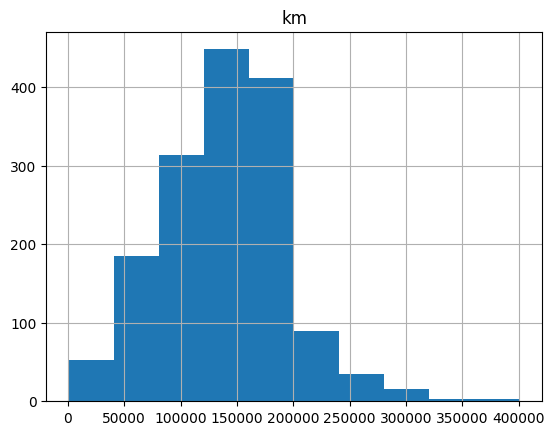

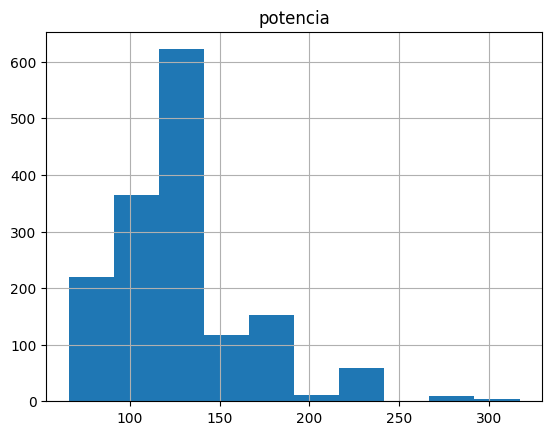

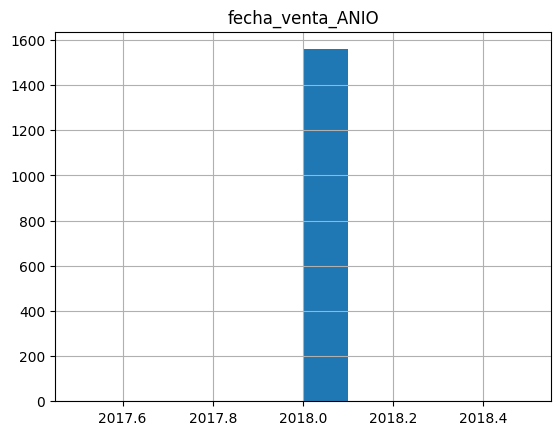

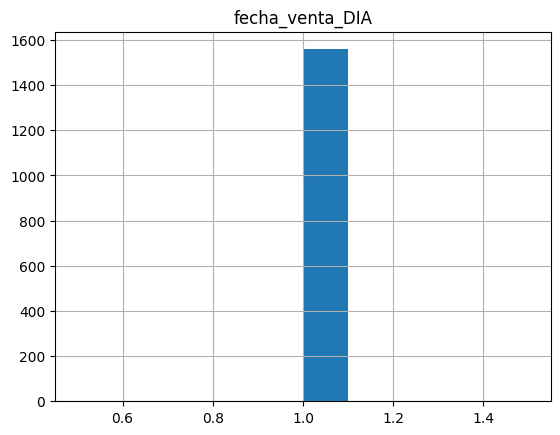

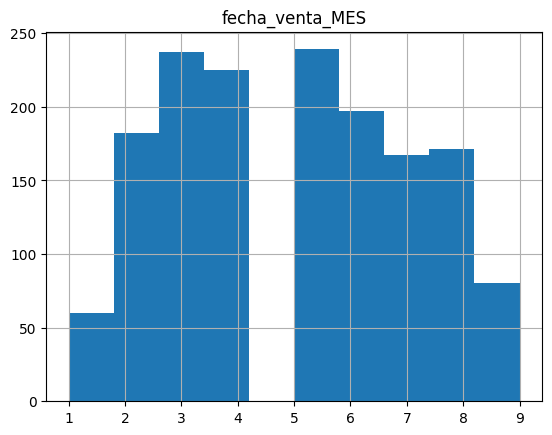

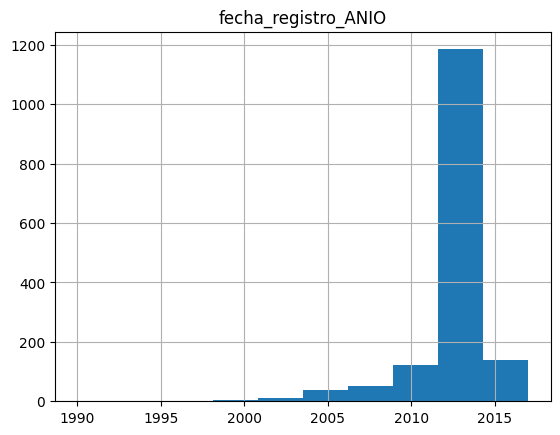

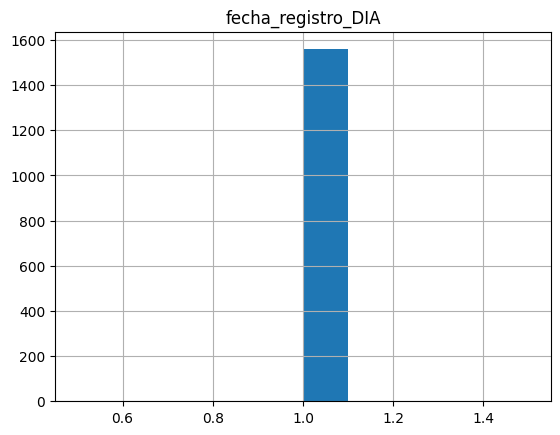

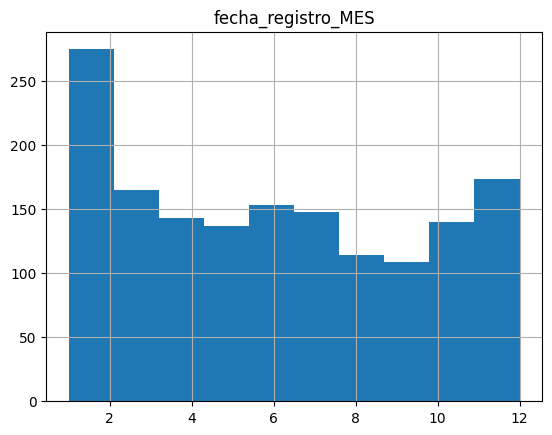

In [143]:
for i in lnum:            # Análisis univariable numéricas
  print(df17.hist(i));

In [144]:
for i in lbool:           # Análisis univariable booleans
  print(df17[i].value_counts())

1    1455
0     103
Name: gps_bool, dtype: int64
1    869
0    689
Name: volante_regulable_bool, dtype: int64
0    1245
1     313
Name: camara_trasera_bool, dtype: int64
0    830
1    728
Name: elevalunas_electrico_bool, dtype: int64
1    1266
0     292
Name: aire_acondicionado_bool, dtype: int64
0    1155
1     403
Name: bluetooth_bool, dtype: int64
1    861
0    697
Name: alerta_lim_velocidad_bool, dtype: int64


In [145]:
for i in lcat:            # Análisis univariable categóricas
  print(df17[i].value_counts())

BMW    1558
Name: marca, dtype: int64
320                  223
520                  213
318                  182
X3                   150
116                   99
X1                    86
316                   80
X5                    75
525                   71
530                   56
118                   40
320 Gran Turismo      30
318 Gran Turismo      28
518                   21
X4                    19
535                   17
420                   16
730                   15
120                   13
X6                    12
330                    9
530 Gran Turismo       9
114                    8
325                    8
520 Gran Turismo       6
640 Gran Coupé         5
740                    5
420 Gran Coupé         5
218 Active Tourer      4
325 Gran Turismo       3
M550                   3
X5 M50                 3
528                    3
M3                     3
125                    3
640                    3
335                    2
435                    2
218         

In [146]:
print(len(df17.columns), "total de variables")
print(len(target), "variable a predecir")
print(len(lcat), "variables categóricas")
print(len(lbool), "variables boolean")
print(len(lnum), "variables numéricas")

22 total de variables
1 variable a predecir
6 variables categóricas
7 variables boolean
8 variables numéricas


In [147]:
df18 = df17.copy()

In [148]:
df18[df18['tipo_gasolina']=='Diesel'] #Nos hemos dado cuenta que hay dos variables que se podrian juntar con diesel y tenerlas all-in-one

,marca,modelo,km,potencia,tipo_gasolina,color,precio,fecha_venta_NOMBREDIA,fecha_venta_ANIO,fecha_venta_DIA,...,fecha_registro_ANIO,fecha_registro_DIA,fecha_registro_MES,gps_bool,volante_regulable_bool,camara_trasera_bool,elevalunas_electrico_bool,aire_acondicionado_bool,bluetooth_bool,alerta_lim_velocidad_bool
226,BMW,320,178944.0,122.0,Diesel,blue,6500.0,Thursday,2018.0,1.0,...,2013.0,1.0,12.0,1,1,0,1,1,0,1
257,BMW,318,105026.0,105.0,Diesel,grey,15700.0,Thursday,2018.0,1.0,...,2014.0,1.0,10.0,1,0,0,1,1,1,0


In [149]:
df18['tipo_gasolina'] = np.where(df18['tipo_gasolina']=='Diesel','diesel',df18['tipo_gasolina'])

In [150]:
df18['tipo_gasolina'].value_counts()

diesel           1492
petrol             63
SIN TIPO            2
hybrid_petrol       1
Name: tipo_gasolina, dtype: int64

In [151]:
df18.drop(df18[df18['tipo_gasolina']=='SIN TIPO'].index,inplace = True)   #Decidimos finalmente eliminar las que eran nulos y las cambiamos por la constante SIN TIPO en los apartados anteriores

In [152]:
df19 = df18.copy()

In [153]:
df19['tipo_gasolina'].value_counts()

diesel           1492
petrol             63
hybrid_petrol       1
Name: tipo_gasolina, dtype: int64

In [154]:
# DATASET LIMPIO

In [155]:
# ANÁLISIS TARGET

In [156]:
corr = df19.corr(numeric_only = True)

In [157]:
corr.style.background_gradient(cmap='coolwarm')

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3931: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3932: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,km,potencia,precio,fecha_venta_ANIO,fecha_venta_DIA,fecha_venta_MES,fecha_registro_ANIO,fecha_registro_DIA,fecha_registro_MES,gps_bool,volante_regulable_bool,camara_trasera_bool,elevalunas_electrico_bool,aire_acondicionado_bool,bluetooth_bool,alerta_lim_velocidad_bool
km,1.000000,-0.031615,-0.399647,nan,nan,-0.031574,-0.468960,nan,-0.010088,0.168909,0.059242,0.038647,0.061156,0.033314,-0.072692,-0.005309
potencia,-0.031615,1.000000,0.681127,nan,nan,-0.062303,0.109174,nan,0.007547,-0.000021,0.313650,0.293718,0.322108,0.209563,0.232078,0.506165
precio,-0.399647,0.681127,1.000000,nan,nan,0.019033,0.352386,nan,-0.031715,-0.013653,0.264592,0.255811,0.222244,0.209145,0.237987,0.447635
fecha_venta_ANIO,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
fecha_venta_DIA,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
fecha_venta_MES,-0.031574,-0.062303,0.019033,nan,nan,1.000000,-0.038629,nan,-0.030524,0.058595,0.083029,0.000393,-0.041985,-0.007450,-0.031337,-0.006745
fecha_registro_ANIO,-0.468960,0.109174,0.352386,nan,nan,-0.038629,1.000000,nan,-0.080338,-0.051177,-0.036026,-0.011165,0.098291,0.245336,0.085255,0.143702
fecha_registro_DIA,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
fecha_registro_MES,-0.010088,0.007547,-0.031715,nan,nan,-0.030524,-0.080338,nan,1.000000,-0.016286,-0.041208,0.012567,0.025529,0.032544,0.020772,-0.000233
gps_bool,0.168909,-0.000021,-0.013653,nan,nan,0.058595,-0.051177,nan,-0.016286,1.000000,0.213842,0.074610,0.196311,0.345784,0.121023,-0.050600


In [158]:
del(df19['fecha_registro_DIA'])

In [159]:
del(df19['fecha_venta_DIA'])

In [160]:
del(df19['fecha_venta_ANIO'])

In [161]:
df20 = df19.copy()

In [162]:
corr = df20.corr(numeric_only = True)

In [163]:
corr.style.background_gradient(cmap='coolwarm')

,km,potencia,precio,fecha_venta_MES,fecha_registro_ANIO,fecha_registro_MES,gps_bool,volante_regulable_bool,camara_trasera_bool,elevalunas_electrico_bool,aire_acondicionado_bool,bluetooth_bool,alerta_lim_velocidad_bool
km,1.000000,-0.031615,-0.399647,-0.031574,-0.468960,-0.010088,0.168909,0.059242,0.038647,0.061156,0.033314,-0.072692,-0.005309
potencia,-0.031615,1.000000,0.681127,-0.062303,0.109174,0.007547,-0.000021,0.313650,0.293718,0.322108,0.209563,0.232078,0.506165
precio,-0.399647,0.681127,1.000000,0.019033,0.352386,-0.031715,-0.013653,0.264592,0.255811,0.222244,0.209145,0.237987,0.447635
fecha_venta_MES,-0.031574,-0.062303,0.019033,1.000000,-0.038629,-0.030524,0.058595,0.083029,0.000393,-0.041985,-0.007450,-0.031337,-0.006745
fecha_registro_ANIO,-0.468960,0.109174,0.352386,-0.038629,1.000000,-0.080338,-0.051177,-0.036026,-0.011165,0.098291,0.245336,0.085255,0.143702
fecha_registro_MES,-0.010088,0.007547,-0.031715,-0.030524,-0.080338,1.000000,-0.016286,-0.041208,0.012567,0.025529,0.032544,0.020772,-0.000233
gps_bool,0.168909,-0.000021,-0.013653,0.058595,-0.051177,-0.016286,1.000000,0.213842,0.074610,0.196311,0.345784,0.121023,-0.050600
volante_regulable_bool,0.059242,0.313650,0.264592,0.083029,-0.036026,-0.041208,0.213842,1.000000,0.272439,0.256470,0.299781,0.121670,0.244126
camara_trasera_bool,0.038647,0.293718,0.255811,0.000393,-0.011165,0.012567,0.074610,0.272439,1.000000,0.204216,0.133777,0.153461,0.194102
elevalunas_electrico_bool,0.061156,0.322108,0.222244,-0.041985,0.098291,0.025529,0.196311,0.256470,0.204216,1.000000,0.281266,0.260051,0.326618


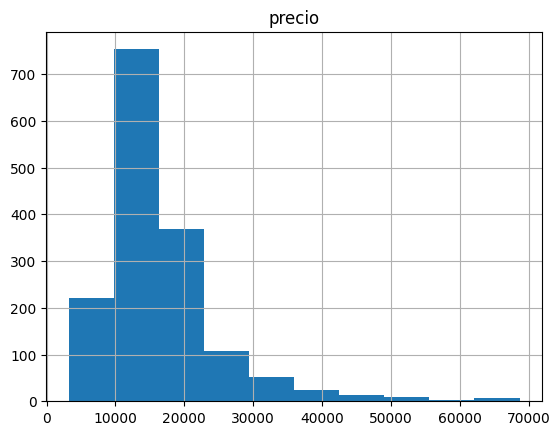

In [164]:
df20.hist('precio');

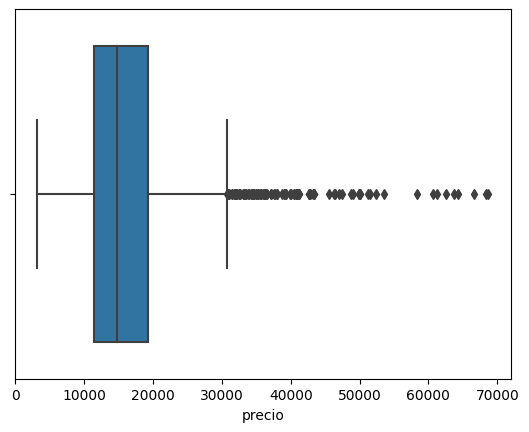

In [165]:
sns.boxplot(x= df20['precio']);

In [166]:
df20["log_precio"]=np.log10(df20["precio"])

array([[<Axes: title={'center': 'log_precio'}>]], dtype=object)

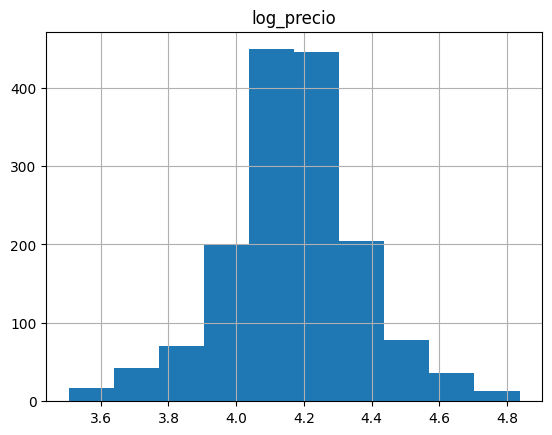

In [167]:
df20.hist('log_precio')

<Axes: xlabel='log_precio'>

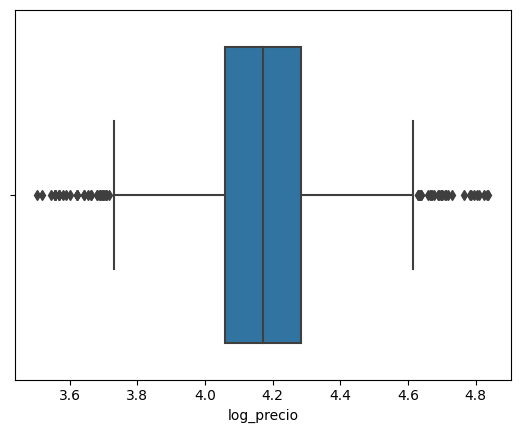

In [168]:
sns.boxplot(x= df20['log_precio'])

In [169]:
df20.head()

,marca,modelo,km,potencia,tipo_gasolina,color,precio,fecha_venta_NOMBREDIA,fecha_venta_MES,fecha_registro_NOMBREDIA,fecha_registro_ANIO,fecha_registro_MES,gps_bool,volante_regulable_bool,camara_trasera_bool,elevalunas_electrico_bool,aire_acondicionado_bool,bluetooth_bool,alerta_lim_velocidad_bool,log_precio
0,BMW,320,183297.0,120.0,diesel,white,10200.0,Thursday,2.0,Sunday,2012.0,4.0,1,0,0,1,0,0,0,4.008600
1,BMW,335,152352.0,225.0,petrol,black,17100.0,Thursday,2.0,Sunday,2011.0,5.0,1,1,0,1,1,1,1,4.232996
2,BMW,118,115560.0,105.0,petrol,white,6100.0,Thursday,2.0,Saturday,2009.0,8.0,1,1,0,0,1,1,0,3.785330
3,BMW,420,77061.0,135.0,diesel,black,36300.0,Thursday,3.0,Saturday,2015.0,8.0,1,1,0,1,1,1,1,4.559907
4,BMW,120,174631.0,120.0,diesel,SIN COLOR,10500.0,Sunday,4.0,Thursday,2009.0,1.0,1,1,0,0,1,0,0,4.021189


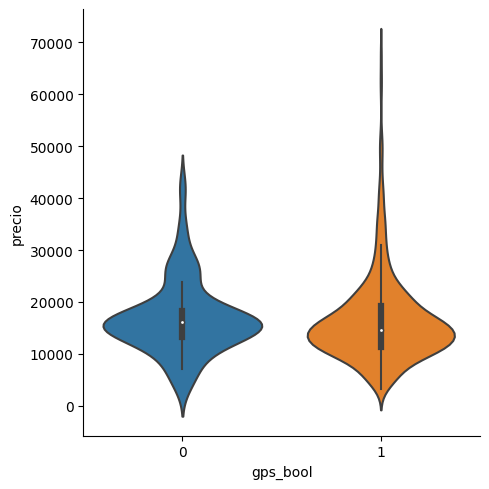

In [170]:
sns.catplot(x="gps_bool",y="precio",kind = 'violin', data=df20)

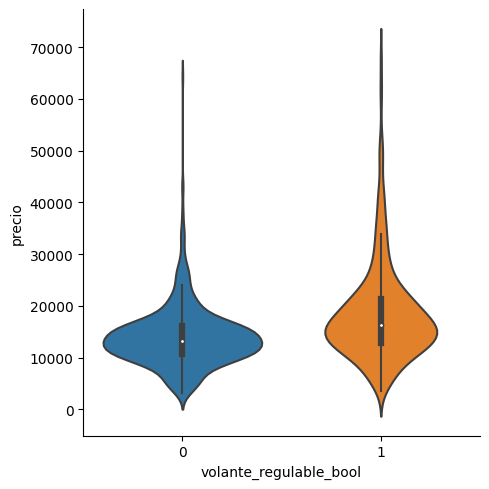

In [171]:
sns.catplot(x="volante_regulable_bool",y="precio",kind = 'violin', data=df20)

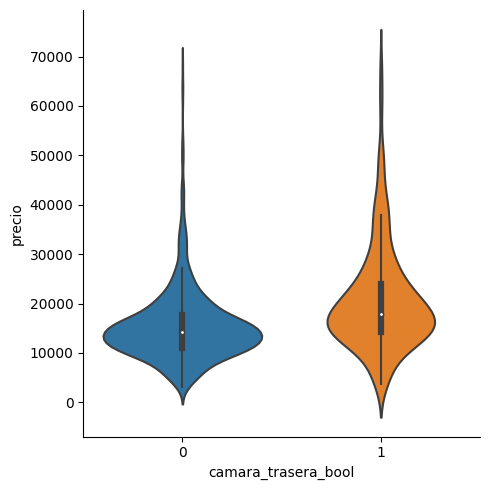

In [172]:
sns.catplot(x="camara_trasera_bool",y="precio",kind = 'violin', data=df20)

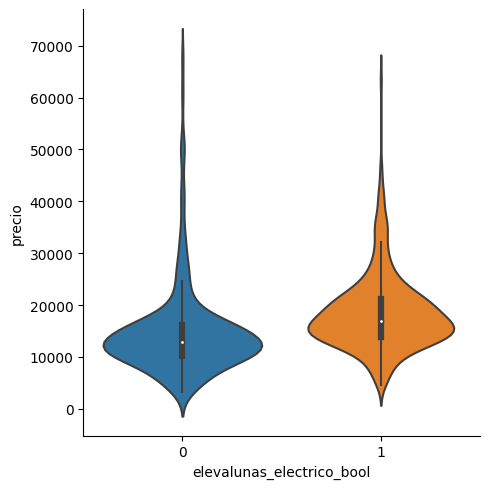

In [173]:
sns.catplot(x="elevalunas_electrico_bool",y="precio",kind = 'violin', data=df20)

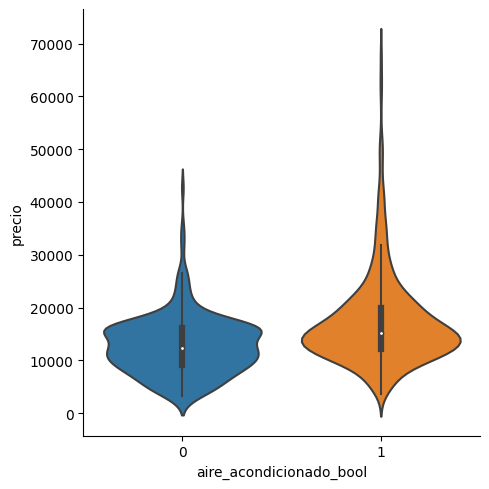

In [174]:
sns.catplot(x="aire_acondicionado_bool",y="precio",kind = 'violin', data=df20)

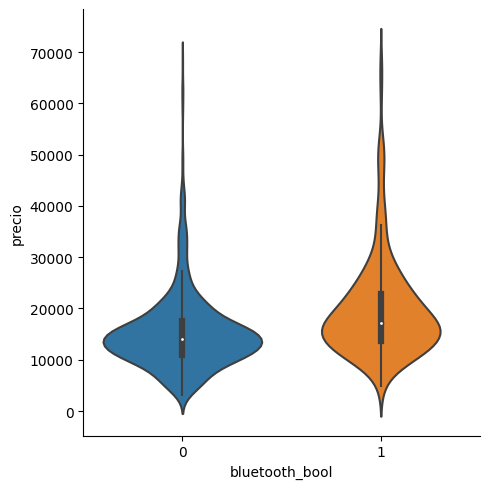

In [175]:
sns.catplot(x="bluetooth_bool",y="precio",kind = 'violin', data=df20)

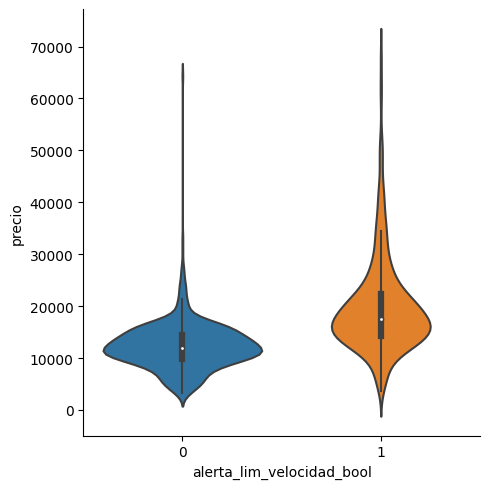

In [176]:
sns.catplot(x="alerta_lim_velocidad_bool",y="precio",kind = 'violin',data=df20)

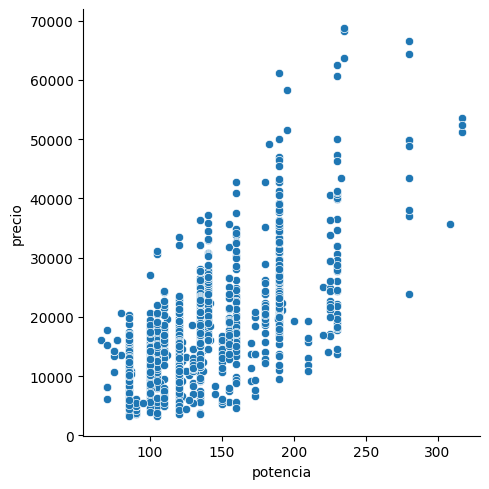

In [177]:
sns.relplot(x='potencia', y= 'precio',data = df20); # mayor potencia más caro

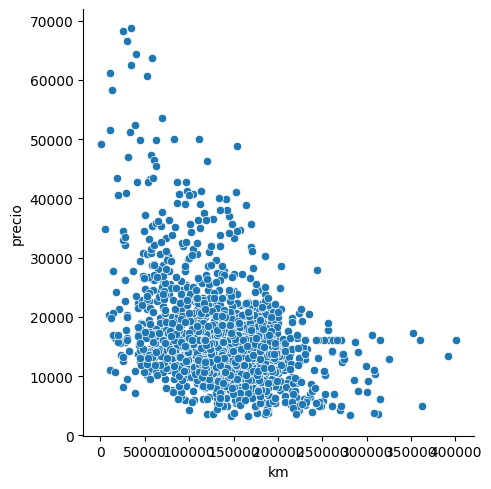

In [178]:
sns.relplot(x='km', y= 'precio',data = df20); # a menor número de Km mayor es su precio, por contra a mayor número de km menor es su precio

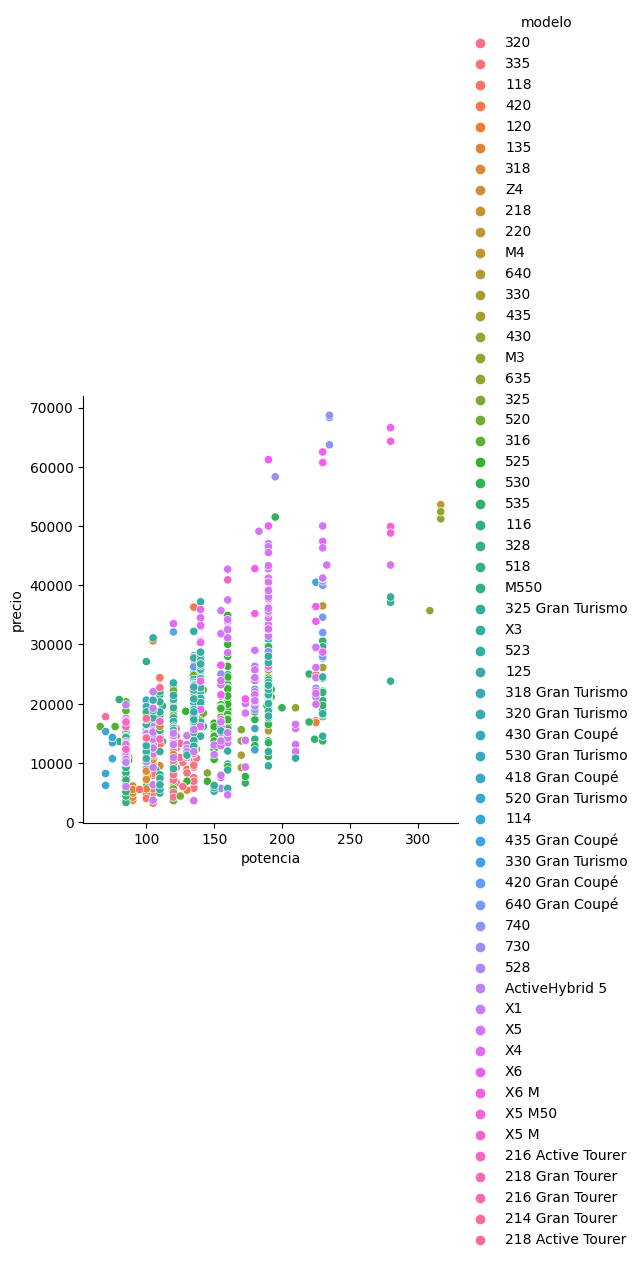

In [179]:
sns.relplot(x='potencia', y= 'precio', hue = 'modelo',data = df20);

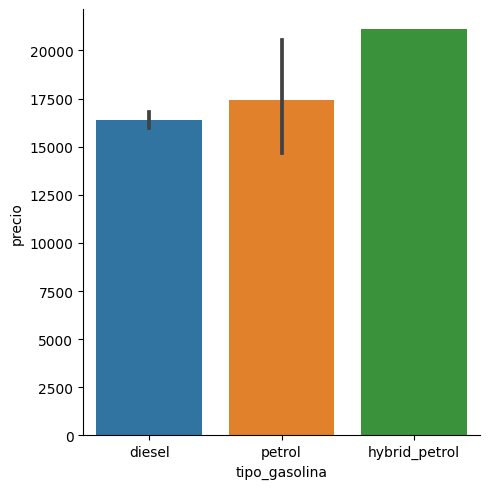

In [219]:
sns.catplot(x='tipo_gasolina', y= 'precio', kind='bar',data = df20);  #los hybridos son más caros seguidos de los de gasolina

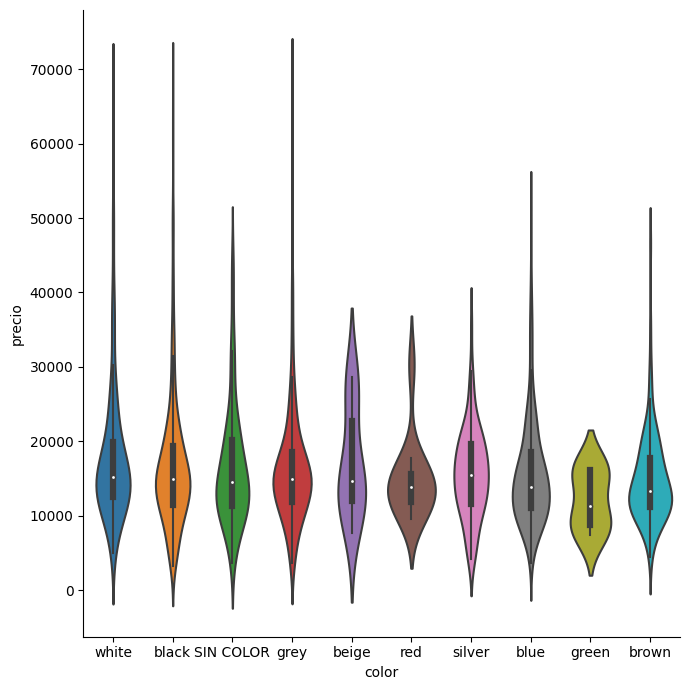

In [181]:
sns.catplot(x='color', y= 'precio',kind='violin', height = 7,data = df20); # El color rojo es algo más caro en rangos entre 10.000 y 20.000 pero el pico de precio máximo es gris

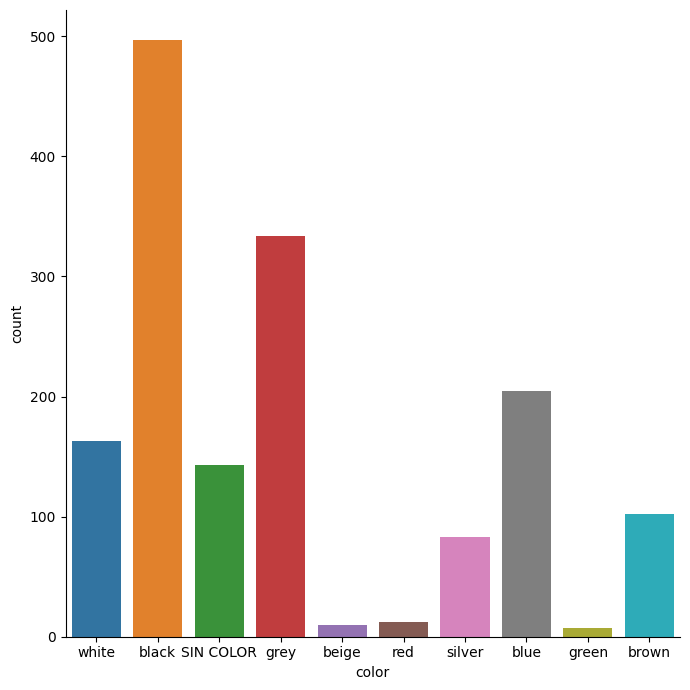

In [182]:
sns.catplot(x='color',kind='count', height = 7,data = df20);

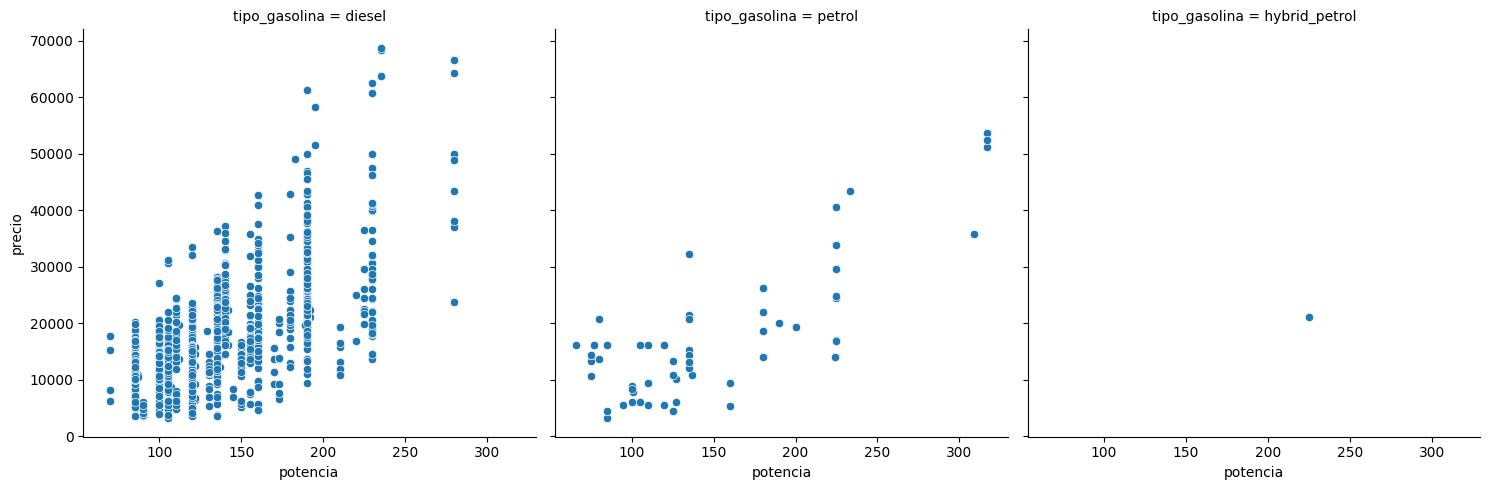

In [183]:
sns.relplot(x='potencia',y='precio',col = 'tipo_gasolina',data = df20); #hay mayor número de coches diesel, más caros y más potentes en comparación al resto

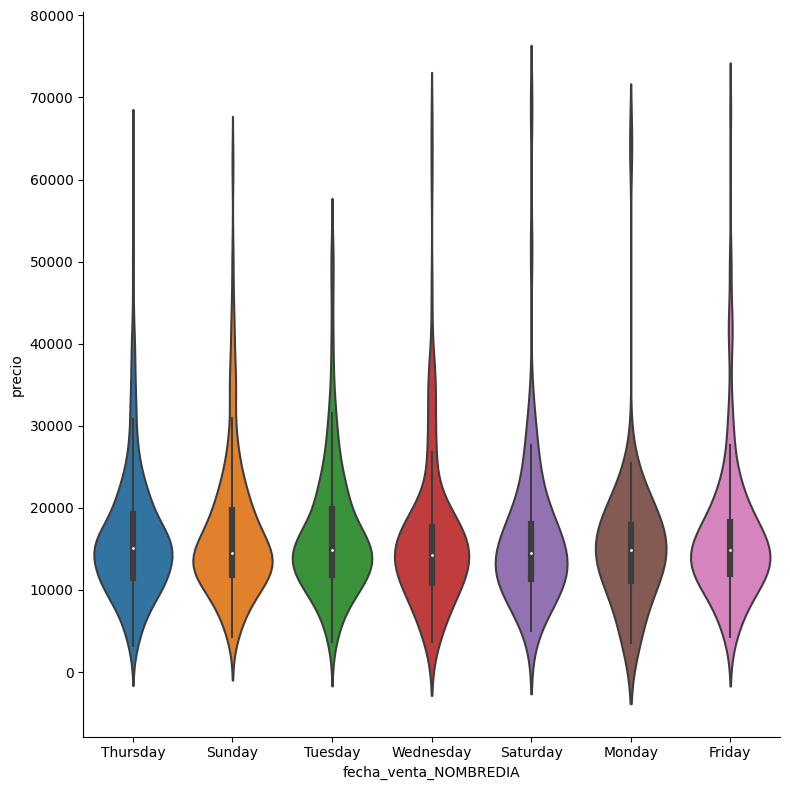

In [184]:
sns.catplot(x= 'fecha_venta_NOMBREDIA',y = 'precio',height=8, kind='violin', data = df20)

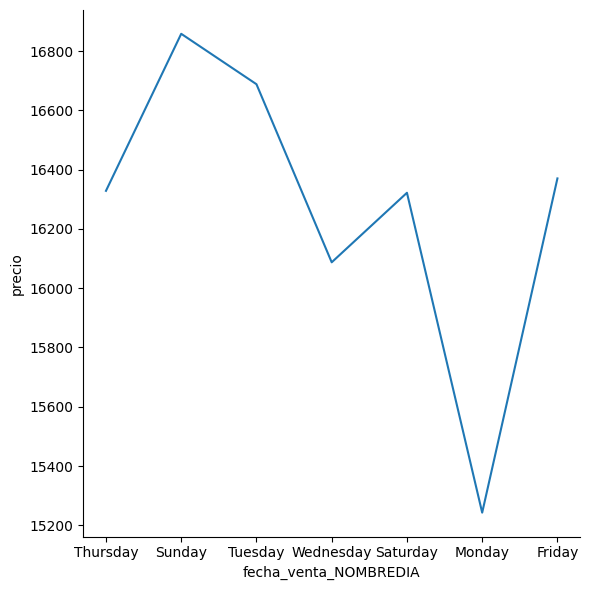

In [185]:
sns.relplot(x= 'fecha_venta_NOMBREDIA',y = 'precio',height = 6, kind='line',err_style = None, data = df20) #Los precios más altos son las ventas realizadas los martes y los precios más bajos los lunes

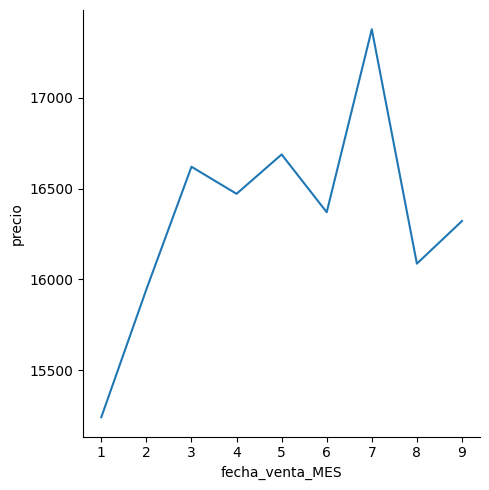

In [186]:
sns.relplot(x= 'fecha_venta_MES',y = 'precio',  kind='line',err_style = None, data = df20) #Los precios más altos son las ventas realizadas los meses de Julio y los precios más bajos los meses de Enero

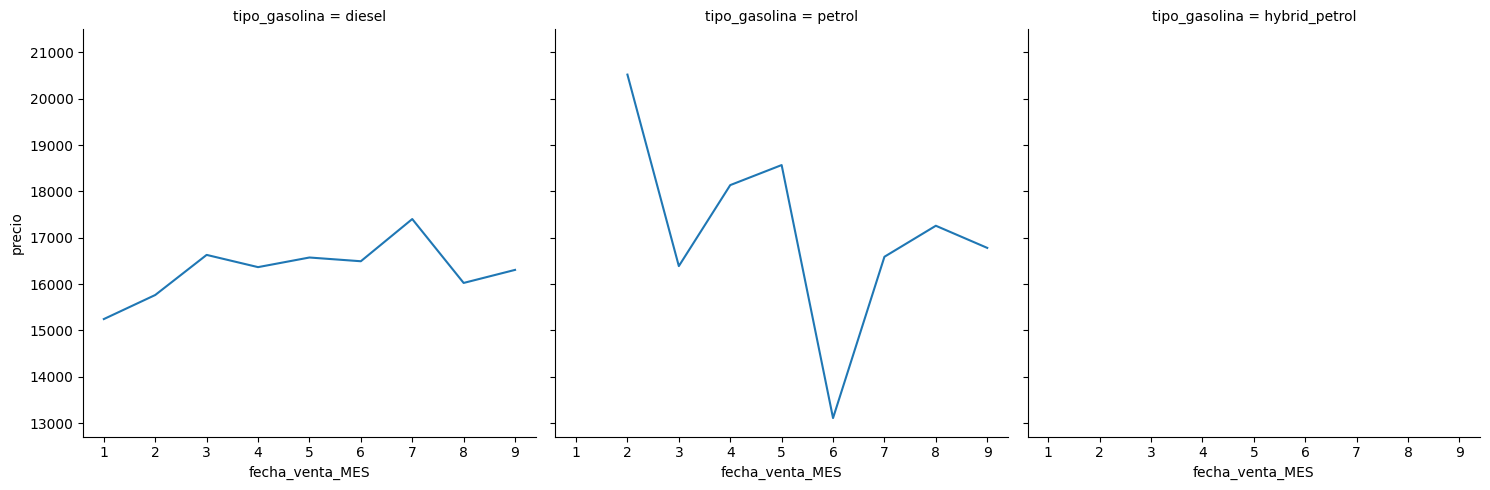

In [187]:
sns.relplot(x= 'fecha_venta_MES',y = 'precio', col = 'tipo_gasolina', kind='line',err_style = None, data = df20)

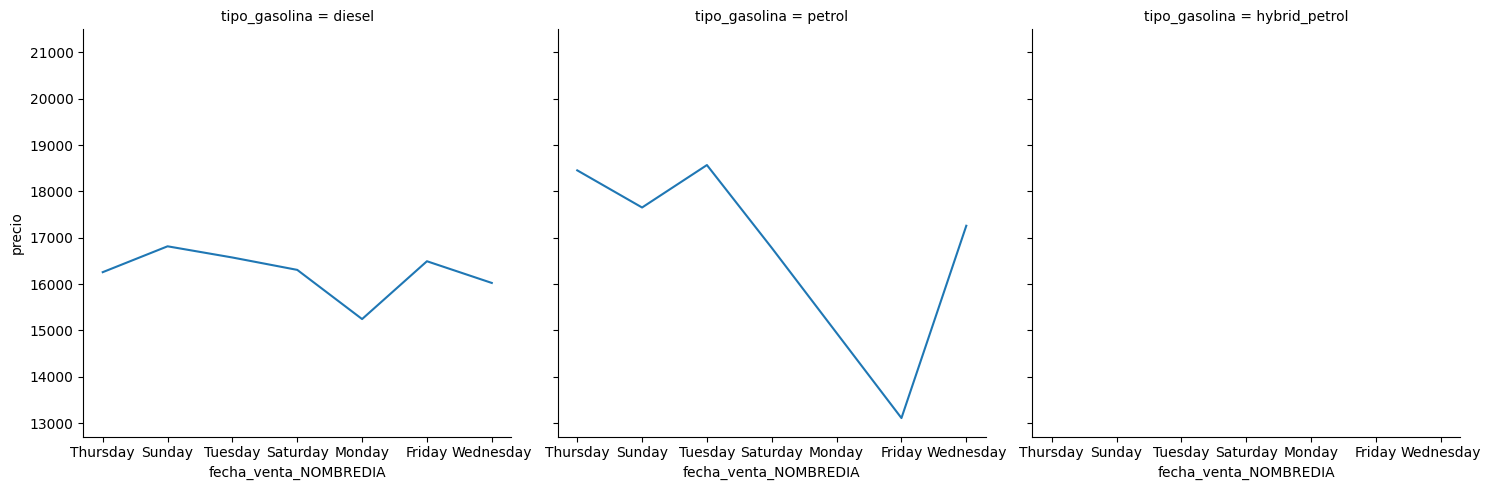

In [188]:
sns.relplot(x= 'fecha_venta_NOMBREDIA',y = 'precio', col = 'tipo_gasolina', kind='line',err_style = None, data = df20)

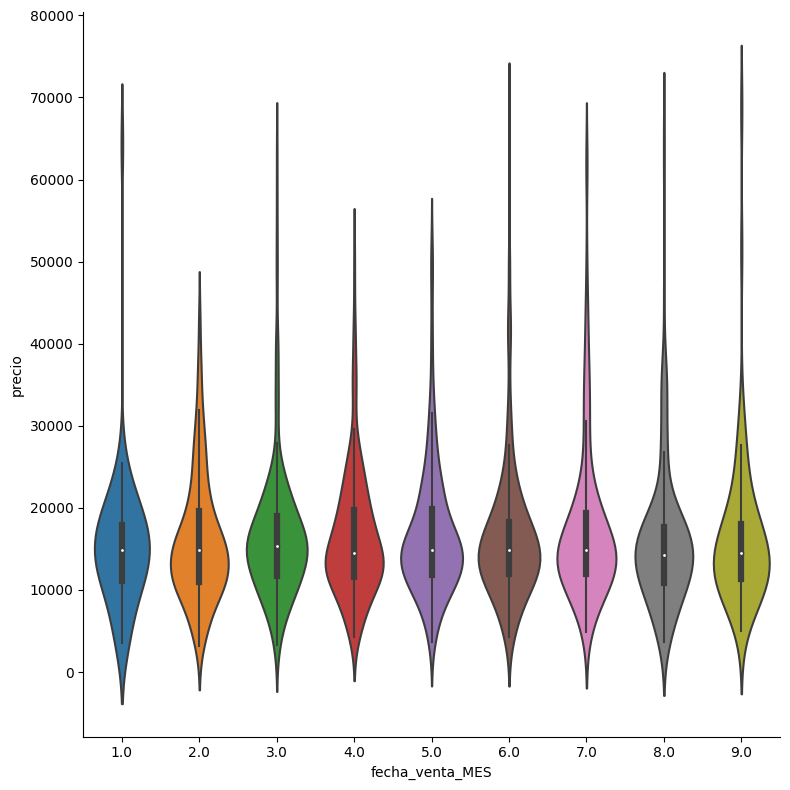

In [189]:
sns.catplot(x= 'fecha_venta_MES',y = 'precio',height=8, kind='violin', data = df20)

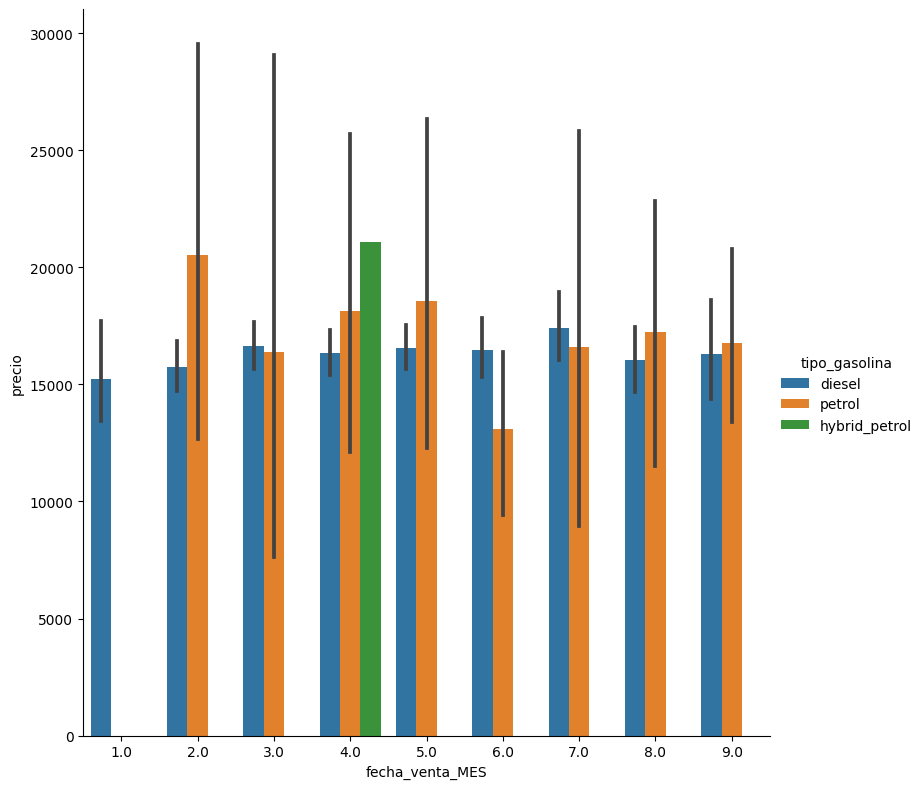

In [190]:
sns.catplot(x= 'fecha_venta_MES',y = 'precio',hue='tipo_gasolina',height=8,kind='bar', data = df20) #Los hibridos se han vendido en su mayoria en Abril, el resto diesel tiene su precio más alto en Julio y los de gasolina en Febrero

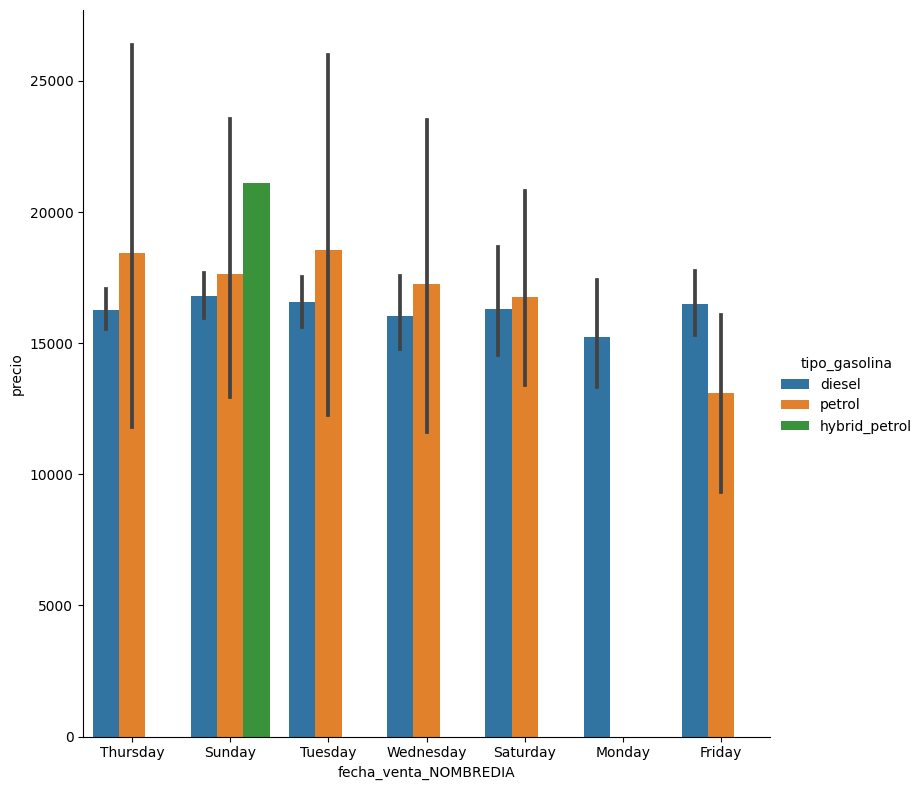

In [191]:
sns.catplot(x= 'fecha_venta_NOMBREDIA',y = 'precio',hue='tipo_gasolina',height=8,kind='bar', data = df19)

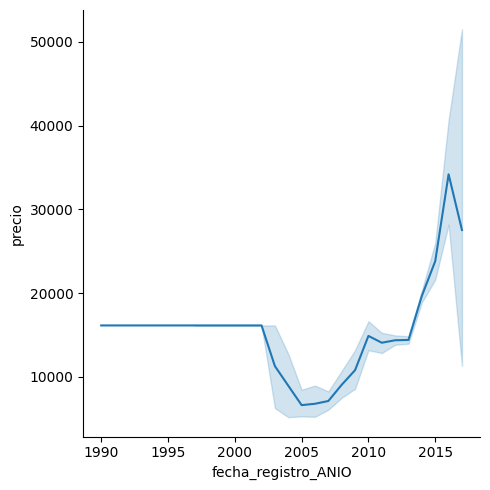

In [192]:
sns.relplot(x='fecha_registro_ANIO', y = 'precio', kind = 'line', data = df20)

# **CONCLUSIÓN TARGET (PRECIO)**

Las variables que más afectan al precio son:

1. Potencia => A mayor potencia mayor el precio. ***Es la característica que más afecta al precio.***

2. El tipo de gasolina => Los hybrid son más caros, auque la muestra es muy pequeña, seguida de los de gasolina y los más baratos los diesel.

3. El año de registro => Se puede observar que los años 2005 a 2009 aprox hubo una bajada de los precios y que fue remontando a partir de 2010.

4. El mes de venta y el día de la semana de venta ==> También influyen en el precio de cara al cliente o bien podemos deducir que detrás puede haber diferente tipo de cliente y compra de manera diferente y de ahí el precio.

5. KM => A menor número de Km mayor es su precio, por contra a mayor número de km menor es su precio.

6. Color => El color más vendido fue el negro. Y el color rojo se vendio a mayor precio entre 10.000 y 20.000 pero el pico de precio máximo es para los coches de color gris.

7. Accesorios => Podríamos decir que en este caso los accesorios no son relevantes en cuanto al precio. Aunque si podemos observar que los coches con accesorios tienen un valor más elevado, aún así no es la característica que más determina este target.

In [193]:
# PREPROCESAMIENTO ML

In [194]:
df20.head()

,marca,modelo,km,potencia,tipo_gasolina,color,precio,fecha_venta_NOMBREDIA,fecha_venta_MES,fecha_registro_NOMBREDIA,fecha_registro_ANIO,fecha_registro_MES,gps_bool,volante_regulable_bool,camara_trasera_bool,elevalunas_electrico_bool,aire_acondicionado_bool,bluetooth_bool,alerta_lim_velocidad_bool,log_precio
0,BMW,320,183297.0,120.0,diesel,white,10200.0,Thursday,2.0,Sunday,2012.0,4.0,1,0,0,1,0,0,0,4.008600
1,BMW,335,152352.0,225.0,petrol,black,17100.0,Thursday,2.0,Sunday,2011.0,5.0,1,1,0,1,1,1,1,4.232996
2,BMW,118,115560.0,105.0,petrol,white,6100.0,Thursday,2.0,Saturday,2009.0,8.0,1,1,0,0,1,1,0,3.785330
3,BMW,420,77061.0,135.0,diesel,black,36300.0,Thursday,3.0,Saturday,2015.0,8.0,1,1,0,1,1,1,1,4.559907
4,BMW,120,174631.0,120.0,diesel,SIN COLOR,10500.0,Sunday,4.0,Thursday,2009.0,1.0,1,1,0,0,1,0,0,4.021189


In [195]:
del(df20['marca']) #Decidimos eliminarla finalmente, ya que de cara al modelo todo es la misma marca y no aportará información significativa

In [196]:
target = ['precio','log_precio']

In [197]:
lista_numerica2,lista_boolean2, lista_categorica2 = tipo_variables(df20)

In [198]:
lista_numerica2

['km',
 'potencia',
 'fecha_venta_MES',
 'fecha_registro_ANIO',
 'fecha_registro_MES']

In [199]:
lista_boolean2

['gps_bool',
 'volante_regulable_bool',
 'camara_trasera_bool',
 'elevalunas_electrico_bool',
 'aire_acondicionado_bool',
 'bluetooth_bool',
 'alerta_lim_velocidad_bool']

In [200]:
lista_categorica2

['modelo',
 'tipo_gasolina',
 'color',
 'fecha_venta_NOMBREDIA',
 'fecha_registro_NOMBREDIA']

In [201]:
df21 = pd.get_dummies(data = df20, columns=lista_categorica2) #Transformamos las variables categóricas a numéricas

In [202]:
df21.head()

,km,potencia,precio,fecha_venta_MES,fecha_registro_ANIO,fecha_registro_MES,gps_bool,volante_regulable_bool,camara_trasera_bool,elevalunas_electrico_bool,...,fecha_venta_NOMBREDIA_Thursday,fecha_venta_NOMBREDIA_Tuesday,fecha_venta_NOMBREDIA_Wednesday,fecha_registro_NOMBREDIA_Friday,fecha_registro_NOMBREDIA_Monday,fecha_registro_NOMBREDIA_Saturday,fecha_registro_NOMBREDIA_Sunday,fecha_registro_NOMBREDIA_Thursday,fecha_registro_NOMBREDIA_Tuesday,fecha_registro_NOMBREDIA_Wednesday
0,183297.0,120.0,10200.0,2.0,2012.0,4.0,1,0,0,1,...,1,0,0,0,0,0,1,0,0,0
1,152352.0,225.0,17100.0,2.0,2011.0,5.0,1,1,0,1,...,1,0,0,0,0,0,1,0,0,0
2,115560.0,105.0,6100.0,2.0,2009.0,8.0,1,1,0,0,...,1,0,0,0,0,1,0,0,0,0
3,77061.0,135.0,36300.0,3.0,2015.0,8.0,1,1,0,1,...,1,0,0,0,0,1,0,0,0,0
4,174631.0,120.0,10500.0,4.0,2009.0,1.0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [203]:
corr = df21.corr(numeric_only = True)

In [204]:
corr.style.background_gradient(cmap='coolwarm')

In [205]:
df22 = df21.copy()

In [206]:
lista_numerica2

['km',
 'potencia',
 'fecha_venta_MES',
 'fecha_registro_ANIO',
 'fecha_registro_MES']

In [207]:
minMaxResultado = MinMaxScaler()

In [208]:
df22[lista_numerica2] = minMaxResultado.fit_transform(df22[lista_numerica2])

In [209]:
df22.head()

,km,potencia,precio,fecha_venta_MES,fecha_registro_ANIO,fecha_registro_MES,gps_bool,volante_regulable_bool,camara_trasera_bool,elevalunas_electrico_bool,...,fecha_venta_NOMBREDIA_Thursday,fecha_venta_NOMBREDIA_Tuesday,fecha_venta_NOMBREDIA_Wednesday,fecha_registro_NOMBREDIA_Friday,fecha_registro_NOMBREDIA_Monday,fecha_registro_NOMBREDIA_Saturday,fecha_registro_NOMBREDIA_Sunday,fecha_registro_NOMBREDIA_Thursday,fecha_registro_NOMBREDIA_Tuesday,fecha_registro_NOMBREDIA_Wednesday
0,0.456665,0.215139,10200.0,0.125,0.814815,0.272727,1,0,0,1,...,1,0,0,0,0,0,1,0,0,0
1,0.379310,0.633466,17100.0,0.125,0.777778,0.363636,1,1,0,1,...,1,0,0,0,0,0,1,0,0,0
2,0.287340,0.155378,6100.0,0.125,0.703704,0.636364,1,1,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0.191102,0.274900,36300.0,0.250,0.925926,0.636364,1,1,0,1,...,1,0,0,0,0,1,0,0,0,0
4,0.435002,0.215139,10500.0,0.375,0.703704,0.000000,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [210]:
df22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1556 entries, 0 to 1557
Data columns (total 99 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   km                                  1556 non-null   float64
 1   potencia                            1556 non-null   float64
 2   precio                              1556 non-null   float64
 3   fecha_venta_MES                     1556 non-null   float64
 4   fecha_registro_ANIO                 1556 non-null   float64
 5   fecha_registro_MES                  1556 non-null   float64
 6   gps_bool                            1556 non-null   int64  
 7   volante_regulable_bool              1556 non-null   int64  
 8   camara_trasera_bool                 1556 non-null   int64  
 9   elevalunas_electrico_bool           1556 non-null   int64  
 10  aire_acondicionado_bool             1556 non-null   int64  
 11  bluetooth_bool                      1556 no

In [211]:
df_BWM_final = df22.copy()

In [212]:
df_BWM_final.shape

(1556, 99)

In [213]:
df_BWM_final = pd.to_pickle('df_BWM_final','/content/drive/MyDrive/Colab Notebooks/Entregable 1/df_BWM_entrega')

In [214]:
df_BWM_recuperacion = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/Entregable 1/df_BWM_entrega')

In [215]:
df22.head().T

,0,1,2,3,4
km,0.456665,0.379310,0.287340,0.191102,0.435002
potencia,0.215139,0.633466,0.155378,0.274900,0.215139
precio,10200.000000,17100.000000,6100.000000,36300.000000,10500.000000
fecha_venta_MES,0.125000,0.125000,0.125000,0.250000,0.375000
fecha_registro_ANIO,0.814815,0.777778,0.703704,0.925926,0.703704
...,...,...,...,...,...
fecha_registro_NOMBREDIA_Saturday,0.000000,0.000000,1.000000,1.000000,0.000000
fecha_registro_NOMBREDIA_Sunday,1.000000,1.000000,0.000000,0.000000,0.000000
fecha_registro_NOMBREDIA_Thursday,0.000000,0.000000,0.000000,0.000000,1.000000
fecha_registro_NOMBREDIA_Tuesday,0.000000,0.000000,0.000000,0.000000,0.000000
